How do the musical characteristics of Taylor Swift and BTS on Spotify differ, and what insights can these differences provide into their respective popularity and audience preferences? 

# Import datasets & preliminary exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
original_taylor_data = pd.read_csv('taylor_swift_spotify.csv')
display(original_taylor_data)

,artist_name,track_name,album_name,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Taylor Swift,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/23,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,70,212600
1,Taylor Swift,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/23,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,71,231833
2,Taylor Swift,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/23,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,72,231000
3,Taylor Swift,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/23,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,71,235800
4,Taylor Swift,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/23,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,70,193289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Taylor Swift,Our Song,Taylor Swift,24/10/06,0.111000,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106
526,Taylor Swift,I'm Only Me When I'm With You,Taylor Swift,24/10/06,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,62,213053
527,Taylor Swift,Invisible,Taylor Swift,24/10/06,0.637000,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226
528,Taylor Swift,A Perfectly Good Heart,Taylor Swift,24/10/06,0.003490,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,57,220146


For Taylor Swift dataset, we convert the 'release_date' to 'year', which can make our future trend analysis easier.

In [3]:
original_taylor_data['release_date'] = pd.to_datetime(original_taylor_data['release_date'], dayfirst=True, format='%d/%m/%y')

original_taylor_data['year'] = original_taylor_data['release_date'].dt.year

original_taylor_data['year'] = original_taylor_data['year'].apply(lambda x: x if x > 2000 else x + 100)

original_taylor_data.drop('release_date', axis=1, inplace=True)

print(original_taylor_data.head())

    artist_name                                     track_name  \
0  Taylor Swift         Welcome To New York (Taylor's Version)   
1  Taylor Swift                 Blank Space (Taylor's Version)   
2  Taylor Swift                       Style (Taylor's Version)   
3  Taylor Swift            Out Of The Woods (Taylor's Version)   
4  Taylor Swift  All You Had To Do Was Stay (Taylor's Version)   

                         album_name  acousticness  danceability  energy  \
0  1989 (Taylor's Version) [Deluxe]      0.009420         0.757   0.610   
1  1989 (Taylor's Version) [Deluxe]      0.088500         0.733   0.733   
2  1989 (Taylor's Version) [Deluxe]      0.000421         0.511   0.822   
3  1989 (Taylor's Version) [Deluxe]      0.000537         0.545   0.885   
4  1989 (Taylor's Version) [Deluxe]      0.000656         0.588   0.721   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.000037    0.3670    -4.840       0.0327  116.998    0.685   
1   

In [4]:
print("Data dims : ", original_taylor_data.shape)

Data dims :  (530, 15)


In [5]:
original_taylor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       530 non-null    object 
 1   track_name        530 non-null    object 
 2   album_name        530 non-null    object 
 3   acousticness      530 non-null    float64
 4   danceability      530 non-null    float64
 5   energy            530 non-null    float64
 6   instrumentalness  530 non-null    float64
 7   liveness          530 non-null    float64
 8   loudness          530 non-null    float64
 9   speechiness       530 non-null    float64
 10  tempo             530 non-null    float64
 11  valence           530 non-null    float64
 12  popularity        530 non-null    int64  
 13  duration_ms       530 non-null    int64  
 14  year              530 non-null    int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 62.2+ KB


In [6]:
original_bts_data = pd.read_csv('bts_song_features.csv')
display(original_bts_data)

,artist_name,album_title,album_release_date,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,BTS,2 Cool 4 Skool,12/06/13,Intro: 2 Cool 4 Skool,51,0.894,0.835,8,-6.249,1,0.2450,0.179000,0.266000,0.1790,0.532,94.871,63787
1,BTS,2 Cool 4 Skool,12/06/13,We Are Bulletproof Pt.2,65,0.753,0.950,8,-5.090,0,0.1600,0.010400,0.000006,0.1340,0.868,144.020,223933
2,BTS,2 Cool 4 Skool,12/06/13,Skit: Circle Room Talk,44,0.598,0.356,9,-18.009,1,0.8020,0.912000,0.000000,0.9130,0.817,121.045,131907
3,BTS,2 Cool 4 Skool,12/06/13,No More Dream,66,0.438,0.864,2,-5.185,1,0.4700,0.011800,0.000002,0.4310,0.594,167.898,222067
4,BTS,2 Cool 4 Skool,12/06/13,Interlude,51,0.914,0.276,1,-13.392,0,0.3190,0.494000,0.762000,0.3920,0.854,125.897,52440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,BTS,"Butter (Hotter, Sweeter, Cooler)",04/06/21,Butter,86,0.759,0.459,8,-5.187,1,0.0948,0.003230,0.000000,0.0906,0.695,109.997,164442
220,BTS,"Butter (Hotter, Sweeter, Cooler)",04/06/21,Butter - Hotter Remix,61,0.702,0.748,8,-5.215,1,0.0489,0.002230,0.000000,0.2300,0.789,110.028,166962
221,BTS,"Butter (Hotter, Sweeter, Cooler)",04/06/21,Butter - Sweeter Remix,59,0.728,0.551,5,-5.375,0,0.0577,0.067400,0.000000,0.3350,0.792,110.059,161935
222,BTS,"Butter (Hotter, Sweeter, Cooler)",04/06/21,Butter - Cooler Remix,60,0.651,0.809,8,-3.667,1,0.1320,0.006320,0.000000,0.3210,0.893,110.045,161633


In [7]:
original_bts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         224 non-null    object 
 1   album_title         224 non-null    object 
 2   album_release_date  224 non-null    object 
 3   track_name          224 non-null    object 
 4   track_popularity    224 non-null    int64  
 5   danceability        224 non-null    float64
 6   energy              224 non-null    float64
 7   key                 224 non-null    int64  
 8   loudness            224 non-null    float64
 9   mode                224 non-null    int64  
 10  speechiness         224 non-null    float64
 11  acousticness        224 non-null    float64
 12  instrumentalness    224 non-null    float64
 13  liveness            224 non-null    float64
 14  valence             224 non-null    float64
 15  tempo               224 non-null    float64
 16  duration

For BTS dataset, we also convert the 'album_release_date' to 'year', which can make our future trend analysis easier.

In [8]:
original_bts_data['album_release_date'] = pd.to_datetime(original_bts_data['album_release_date'], dayfirst=True, format='%d/%m/%y')

original_bts_data['year'] = original_bts_data['album_release_date'].dt.year

original_bts_data['year'] = original_bts_data['year'].apply(lambda x: x if x > 2000 else x + 100)

original_bts_data.drop('album_release_date', axis=1, inplace=True)

print(original_bts_data.head())

  artist_name     album_title               track_name  track_popularity  \
0         BTS  2 Cool 4 Skool    Intro: 2 Cool 4 Skool                51   
1         BTS  2 Cool 4 Skool  We Are Bulletproof Pt.2                65   
2         BTS  2 Cool 4 Skool   Skit: Circle Room Talk                44   
3         BTS  2 Cool 4 Skool            No More Dream                66   
4         BTS  2 Cool 4 Skool                Interlude                51   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.894   0.835    8    -6.249     1        0.245        0.1790   
1         0.753   0.950    8    -5.090     0        0.160        0.0104   
2         0.598   0.356    9   -18.009     1        0.802        0.9120   
3         0.438   0.864    2    -5.185     1        0.470        0.0118   
4         0.914   0.276    1   -13.392     0        0.319        0.4940   

   instrumentalness  liveness  valence    tempo  duration_ms  year  
0          0.266000    

In [9]:
print("Data dims : ", original_bts_data.shape)

Data dims :  (224, 17)


In [10]:
original_bts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       224 non-null    object 
 1   album_title       224 non-null    object 
 2   track_name        224 non-null    object 
 3   track_popularity  224 non-null    int64  
 4   danceability      224 non-null    float64
 5   energy            224 non-null    float64
 6   key               224 non-null    int64  
 7   loudness          224 non-null    float64
 8   mode              224 non-null    int64  
 9   speechiness       224 non-null    float64
 10  acousticness      224 non-null    float64
 11  instrumentalness  224 non-null    float64
 12  liveness          224 non-null    float64
 13  valence           224 non-null    float64
 14  tempo             224 non-null    float64
 15  duration_ms       224 non-null    int64  
 16  year              224 non-null    int64  
dt

## - Data Cleaning
In our datasets, there is no missing value, so we don't need to remove anything from the original datasets.

From preliminary exploration, we noticed that taylor_data has 530 rows while original_bts_data only has 224 rows. In order to match BTS dataset with Taylor Swift dataset, we decide to use bootstrapping to randomly sample rows from the dataset and add duplicates or slight variations to increase the overall number of rows of BTS dataset.

Here is how bootstrapping works:

1) Calculate the difference in the number of rows.
2) Generate bootstrapped samples by randomly sampling one row from the BTS dataset with replacementuntil the number of rows in the  BTS dataset matches the number of rows in the Taylor Swift dataset.
3) Append the bootstrapped sample generated in the previous step to the bootstrapped_samples list
4) Concatenate original BTS dataset with bootstrapped samples

In [11]:
num_rows_difference = len(original_taylor_data) - len(original_bts_data)
bootstrapped_samples = []
for _ in range(num_rows_difference):
    bootstrapped_sample = original_bts_data.sample(n=1, replace=True)
    bootstrapped_samples.append(bootstrapped_sample)
bts_data = pd.concat([original_bts_data] + bootstrapped_samples, ignore_index=True)

In [12]:
display(bts_data)

,artist_name,album_title,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,BTS,2 Cool 4 Skool,Intro: 2 Cool 4 Skool,51,0.894,0.835,8,-6.249,1,0.2450,0.17900,0.266000,0.1790,0.532,94.871,63787,2013
1,BTS,2 Cool 4 Skool,We Are Bulletproof Pt.2,65,0.753,0.950,8,-5.090,0,0.1600,0.01040,0.000006,0.1340,0.868,144.020,223933,2013
2,BTS,2 Cool 4 Skool,Skit: Circle Room Talk,44,0.598,0.356,9,-18.009,1,0.8020,0.91200,0.000000,0.9130,0.817,121.045,131907,2013
3,BTS,2 Cool 4 Skool,No More Dream,66,0.438,0.864,2,-5.185,1,0.4700,0.01180,0.000002,0.4310,0.594,167.898,222067,2013
4,BTS,2 Cool 4 Skool,Interlude,51,0.914,0.276,1,-13.392,0,0.3190,0.49400,0.762000,0.3920,0.854,125.897,52440,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,BTS,Love Yourself 绲 'Answer',Answer : Love Myself,70,0.568,0.793,1,-3.749,1,0.0406,0.18900,0.000000,0.1110,0.450,108.051,251280,2018
526,BTS,Love Yourself _ 'Her',Go Go,72,0.856,0.617,10,-5.308,0,0.0840,0.17100,0.000000,0.0857,0.759,136.081,235780,2017
527,BTS,Love Yourself 杞 'Tear',Love Maze,72,0.637,0.876,9,-4.652,1,0.0618,0.04830,0.000000,0.0728,0.759,149.930,221529,2018
528,BTS,Love Yourself 绲 'Answer',FAKE LOVE - Rocking Vibe Mix,58,0.466,0.804,2,-4.009,0,0.0392,0.05730,0.000000,0.4320,0.352,154.901,238494,2018


In [13]:
print("Data dims : ", bts_data.shape)

Data dims :  (530, 17)


# Exploratory Data Analysis:

This section aims to explore the description statistics of the BTS and Taylor Swift Spotify Data such as mean, median, range, quartiles and standard deviation from all numeric data to establish a relationship and draw a correlation amongst these variables.

In [14]:
#Function to extract relevant dataframes
def extract_dataframes(df):

    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input is not a DataFrame.")

    # Initialise an empty dictionary to store relevant DataFrames
    relevant_dataframes = {}

    for var in df.columns:
        var_df = pd.DataFrame(df[var])
        # Store the new DataFrame in the dictionary with the column name as the key
        relevant_dataframes[var] = var_df

    return relevant_dataframes

In [15]:
extract_dataframes(original_taylor_data)

{'artist_name':       artist_name
 0    Taylor Swift
 1    Taylor Swift
 2    Taylor Swift
 3    Taylor Swift
 4    Taylor Swift
 ..            ...
 525  Taylor Swift
 526  Taylor Swift
 527  Taylor Swift
 528  Taylor Swift
 529  Taylor Swift
 
 [530 rows x 1 columns],
 'track_name':                                         track_name
 0           Welcome To New York (Taylor's Version)
 1                   Blank Space (Taylor's Version)
 2                         Style (Taylor's Version)
 3              Out Of The Woods (Taylor's Version)
 4    All You Had To Do Was Stay (Taylor's Version)
 ..                                             ...
 525                                       Our Song
 526                  I'm Only Me When I'm With You
 527                                      Invisible
 528                         A Perfectly Good Heart
 529           Teardrops on My Guitar - Pop Version
 
 [530 rows x 1 columns],
 'album_name':                            album_name
 0    1989 (

In [16]:
extract_dataframes(bts_data)

{'artist_name':     artist_name
 0           BTS
 1           BTS
 2           BTS
 3           BTS
 4           BTS
 ..          ...
 525         BTS
 526         BTS
 527         BTS
 528         BTS
 529         BTS
 
 [530 rows x 1 columns],
 'album_title':                                           album_title
 0                                      2 Cool 4 Skool
 1                                      2 Cool 4 Skool
 2                                      2 Cool 4 Skool
 3                                      2 Cool 4 Skool
 4                                      2 Cool 4 Skool
 ..                                                ...
 525                          Love Yourself 绲 'Answer'
 526                             Love Yourself _ 'Her'
 527                            Love Yourself 杞 'Tear'
 528                          Love Yourself 绲 'Answer'
 529  The Most Beautiful Moment in Life: Young Forever
 
 [530 rows x 1 columns],
 'track_name':                        track_name
 0 

In [17]:
original_taylor_data.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.319247,0.585285,0.574609,0.004005,0.163492,-7.505434,0.055889,122.332311,0.397379,62.777358,239978.624528,2017.200000
std,0.327043,0.113121,0.191565,0.033163,0.142263,2.939040,0.070300,30.000272,0.199589,15.224702,46119.983031,5.270168
min,0.000184,0.243000,0.118000,0.000000,0.035700,-17.932000,0.023100,68.097000,0.037400,32.000000,83253.000000,2006.000000
25%,0.036250,0.516000,0.443000,0.000000,0.096600,-9.222000,0.030325,96.939500,0.230000,50.000000,211813.000000,2012.000000
50%,0.165000,0.595500,0.589500,0.000002,0.115000,-7.012000,0.037300,119.030000,0.385500,68.000000,235273.000000,2020.000000
75%,0.653000,0.653000,0.729750,0.000056,0.163000,-5.361750,0.055225,143.934250,0.535000,74.000000,260361.000000,2021.000000
max,0.971000,0.897000,0.950000,0.488000,0.931000,-1.909000,0.912000,208.918000,0.943000,99.000000,613026.000000,2023.000000


In [18]:
bts_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,59.415094,0.618989,0.775043,5.128302,-4.906472,0.483019,0.162920,0.133526,0.023951,0.205104,0.556279,117.941972,218700.616981,2016.805660
std,11.097325,0.116832,0.156045,3.570324,2.774191,0.500184,0.162190,0.189290,0.131333,0.163674,0.200858,26.109632,46132.537350,2.268792
min,29.000000,0.315000,0.167000,0.000000,-21.117000,0.000000,0.027600,0.000178,0.000000,0.044300,0.134000,69.980000,41757.000000,2013.000000
25%,52.000000,0.547000,0.712000,2.000000,-5.394500,0.000000,0.054725,0.010475,0.000000,0.088700,0.386000,97.013500,199054.000000,2015.000000
50%,59.000000,0.619000,0.817000,5.000000,-4.515000,0.000000,0.097600,0.044600,0.000000,0.141500,0.569000,114.035000,227233.000000,2017.000000
75%,69.000000,0.707000,0.889000,8.000000,-3.263000,1.000000,0.232000,0.179000,0.000000,0.301000,0.726000,136.081000,242293.000000,2018.000000
max,86.000000,0.914000,0.993000,11.000000,-0.826000,1.000000,0.936000,0.912000,0.803000,0.923000,0.936000,185.832000,323640.000000,2021.000000


In [19]:
def computing_correlation(df):
    numeric_data_df = df.select_dtypes(include=['number'])

    correlation_matrix = numeric_data_df.corr()

    return correlation_matrix

In [20]:
computing_correlation(original_taylor_data)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
acousticness,1.000000,-0.164865,-0.709822,0.150512,-0.135063,-0.717599,0.049464,-0.080055,-0.194686,0.083459,-0.029785,0.205482
danceability,-0.164865,1.000000,0.029458,-0.092990,-0.143591,0.003267,0.192788,-0.219289,0.312468,0.056259,-0.322792,0.076360
energy,-0.709822,0.029458,1.000000,-0.090230,0.156221,0.788294,-0.087605,0.188427,0.474844,-0.091544,-0.053484,-0.208568
instrumentalness,0.150512,-0.092990,-0.090230,1.000000,-0.039979,-0.208814,-0.017342,-0.008387,-0.079922,0.056351,-0.019371,0.089311
liveness,-0.135063,-0.143591,0.156221,-0.039979,1.000000,0.112448,0.094134,-0.015203,-0.075754,-0.160821,0.122949,-0.222839
loudness,-0.717599,0.003267,0.788294,-0.208814,0.112448,1.000000,-0.261008,0.140450,0.338557,-0.191430,0.095387,-0.376604
speechiness,0.049464,0.192788,-0.087605,-0.017342,0.094134,-0.261008,1.000000,0.033108,0.066943,0.051480,-0.328110,0.091549
tempo,-0.080055,-0.219289,0.188427,-0.008387,-0.015203,0.140450,0.033108,1.000000,0.092255,-0.016184,-0.011365,-0.032614
valence,-0.194686,0.312468,0.474844,-0.079922,-0.075754,0.338557,0.066943,0.092255,1.000000,-0.075462,-0.282532,-0.089947
popularity,0.083459,0.056259,-0.091544,0.056351,-0.160821,-0.191430,0.051480,-0.016184,-0.075462,1.000000,-0.120510,0.615136


In [21]:
computing_correlation(bts_data)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
track_popularity,1.000000,0.024670,-0.004284,0.070840,0.131722,-0.110092,-0.357801,-0.170287,-0.249530,-0.203478,-0.108576,0.039353,0.191013,0.230181
danceability,0.024670,1.000000,-0.055121,0.053371,0.040732,-0.042444,-0.184489,-0.107298,0.286469,-0.211870,0.378720,-0.053057,-0.007222,0.161965
energy,-0.004284,-0.055121,1.000000,0.021885,0.761097,-0.135995,-0.138085,-0.534272,-0.150519,-0.119685,0.249092,0.135584,0.229388,-0.163813
key,0.070840,0.053371,0.021885,1.000000,-0.032490,-0.065466,0.045658,-0.064925,0.092666,-0.085754,0.007673,0.127269,0.040892,0.089430
loudness,0.131722,0.040732,0.761097,-0.032490,1.000000,-0.193557,-0.469070,-0.651379,-0.118430,-0.299523,0.142384,0.106673,0.340738,-0.036497
mode,-0.110092,-0.042444,-0.135995,-0.065466,-0.193557,1.000000,0.116539,0.172670,0.128122,0.072016,0.013011,0.064663,-0.080808,-0.048723
speechiness,-0.357801,-0.184489,-0.138085,0.045658,-0.469070,0.116539,1.000000,0.575890,-0.090522,0.486165,0.171160,-0.002618,-0.248840,-0.351641
acousticness,-0.170287,-0.107298,-0.534272,-0.064925,-0.651379,0.172670,0.575890,1.000000,-0.079136,0.349306,0.040588,-0.124726,-0.248995,-0.208397
instrumentalness,-0.249530,0.286469,-0.150519,0.092666,-0.118430,0.128122,-0.090522,-0.079136,1.000000,-0.137577,0.014566,-0.073441,-0.285245,0.098839
liveness,-0.203478,-0.211870,-0.119685,-0.085754,-0.299523,0.072016,0.486165,0.349306,-0.137577,1.000000,0.131795,-0.054558,-0.127606,-0.200741


## - Trend Analysis: How have the musical attributes of Taylor Swift's songs changed over time?
Can be done by - Plotting the yearly average of each attribute

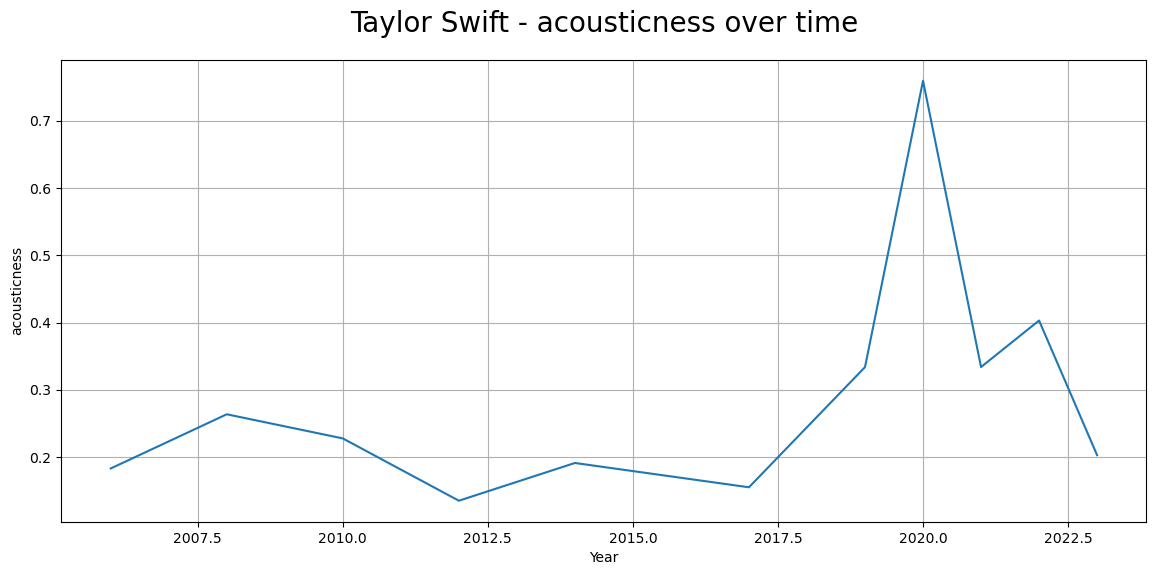

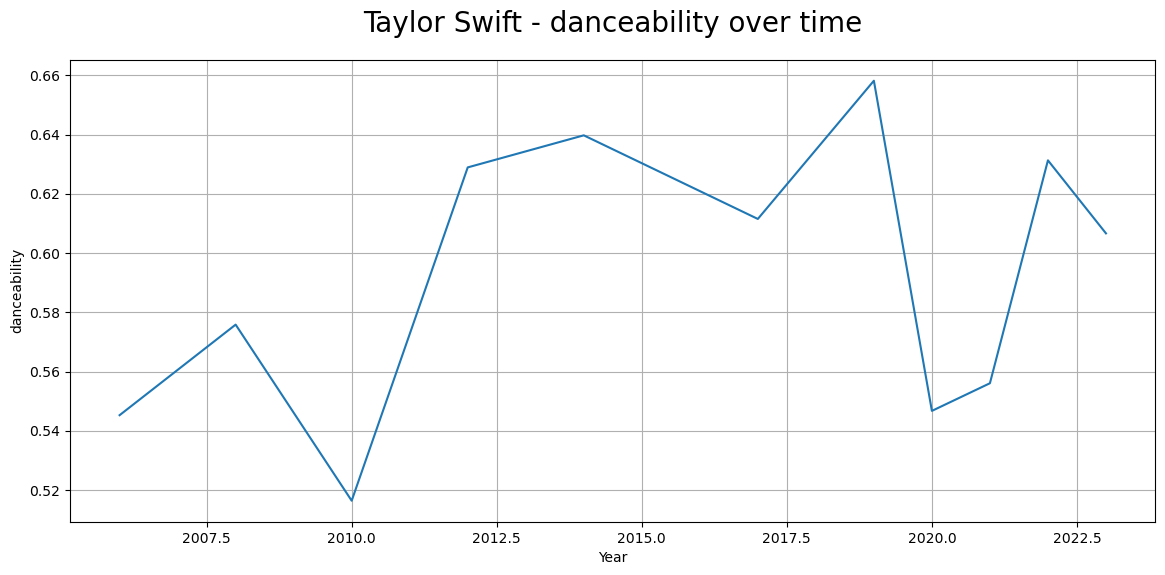

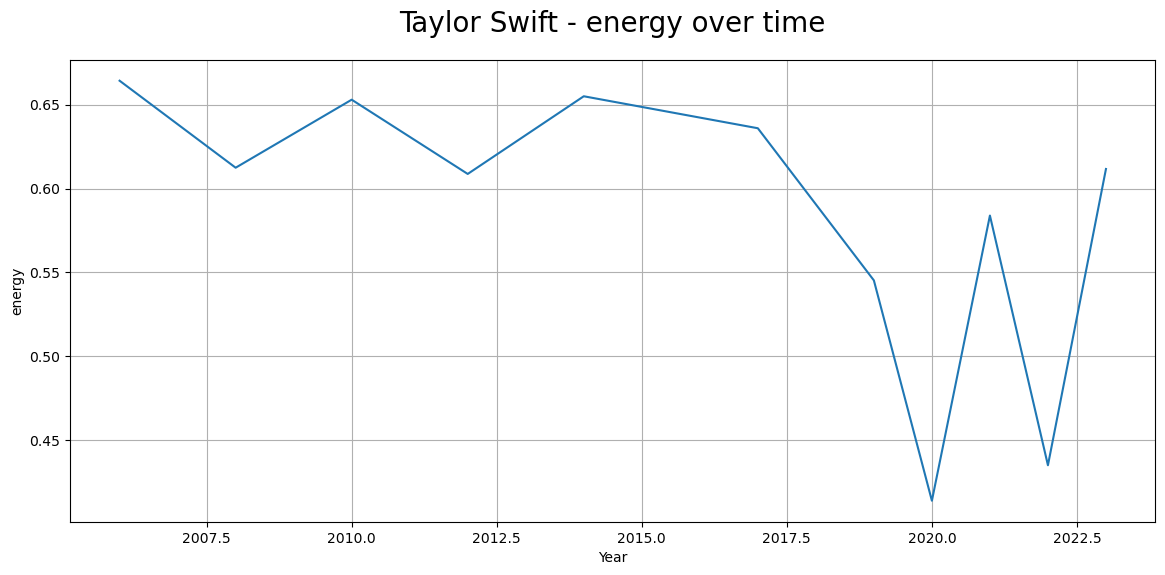

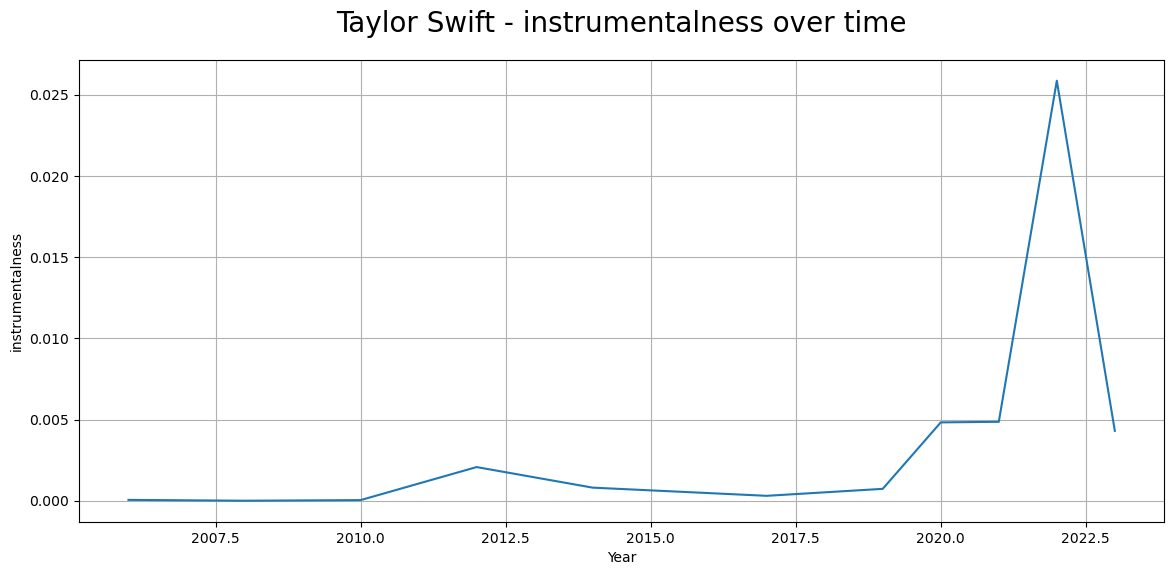

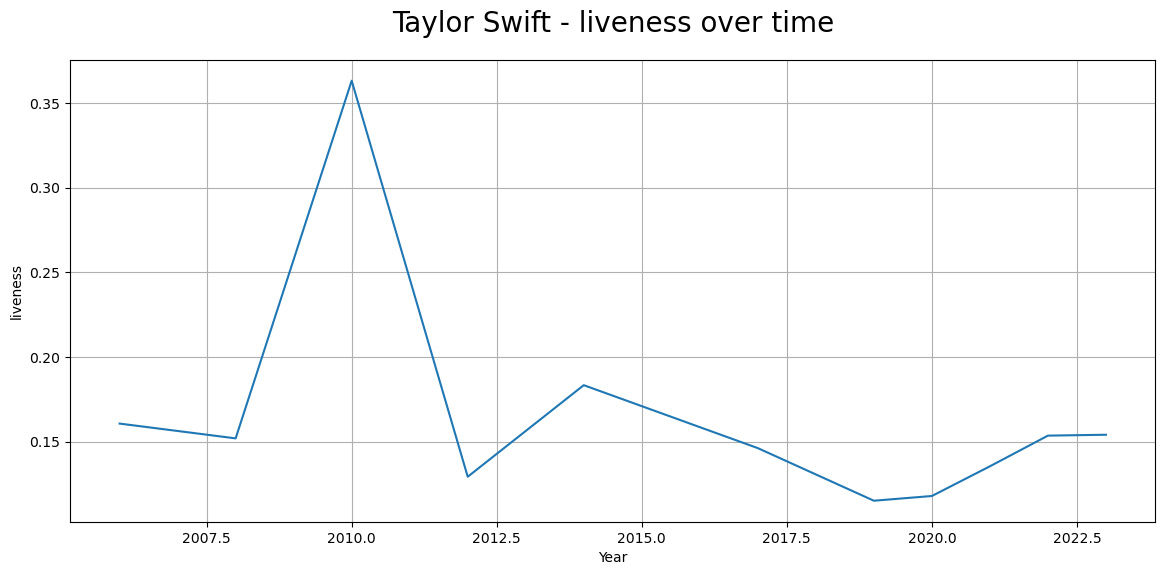

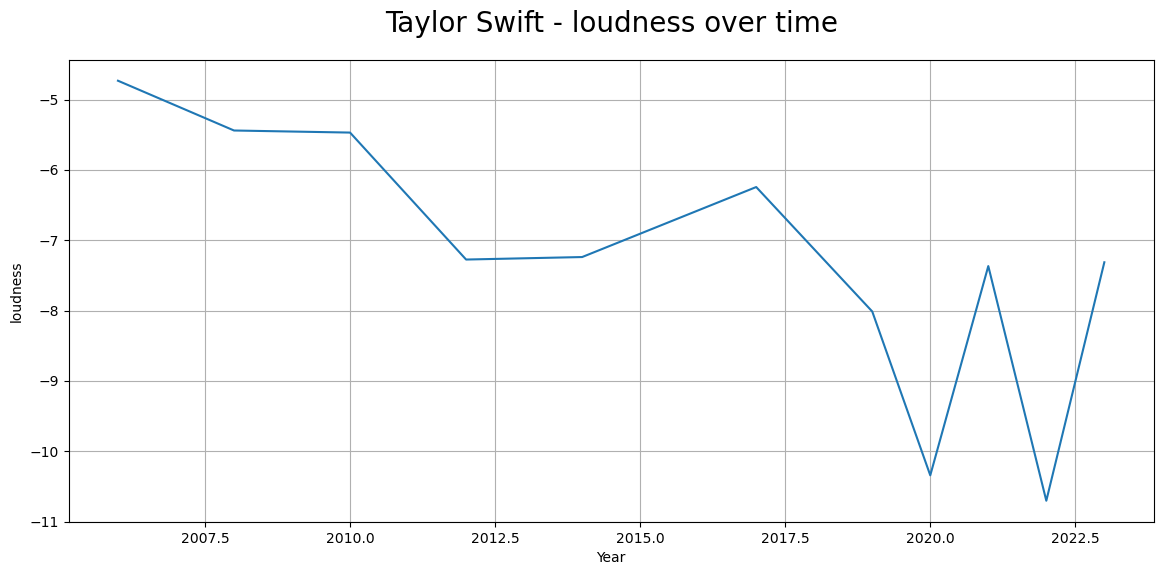

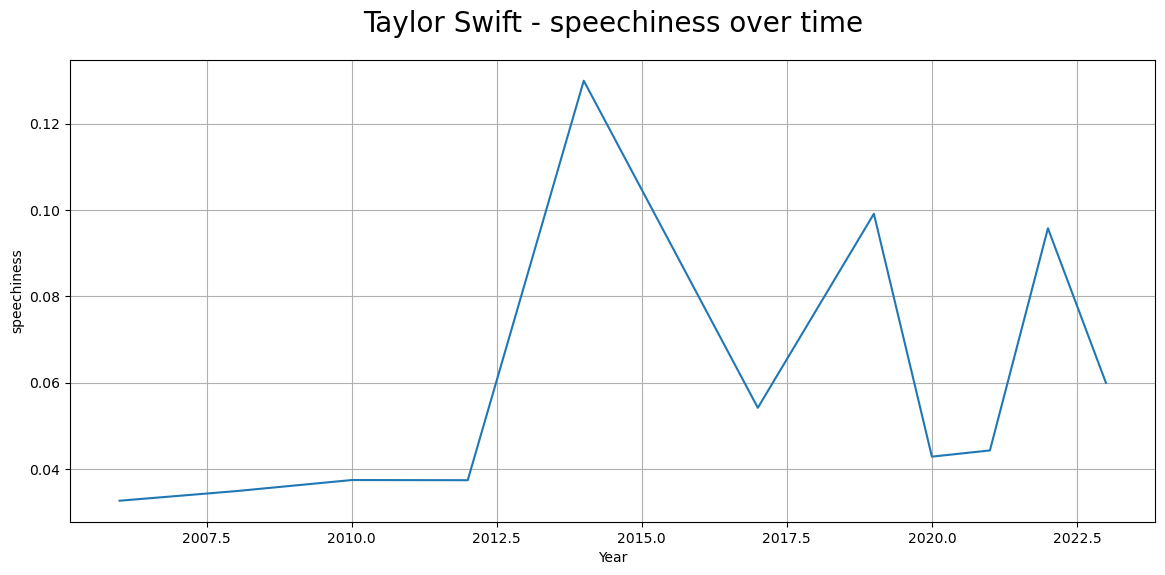

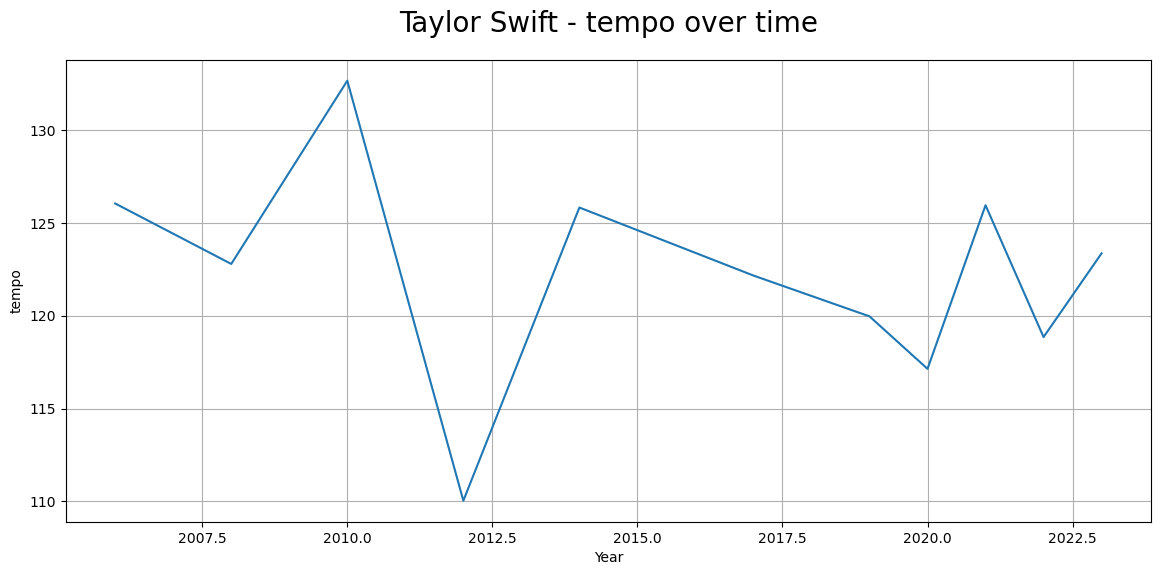

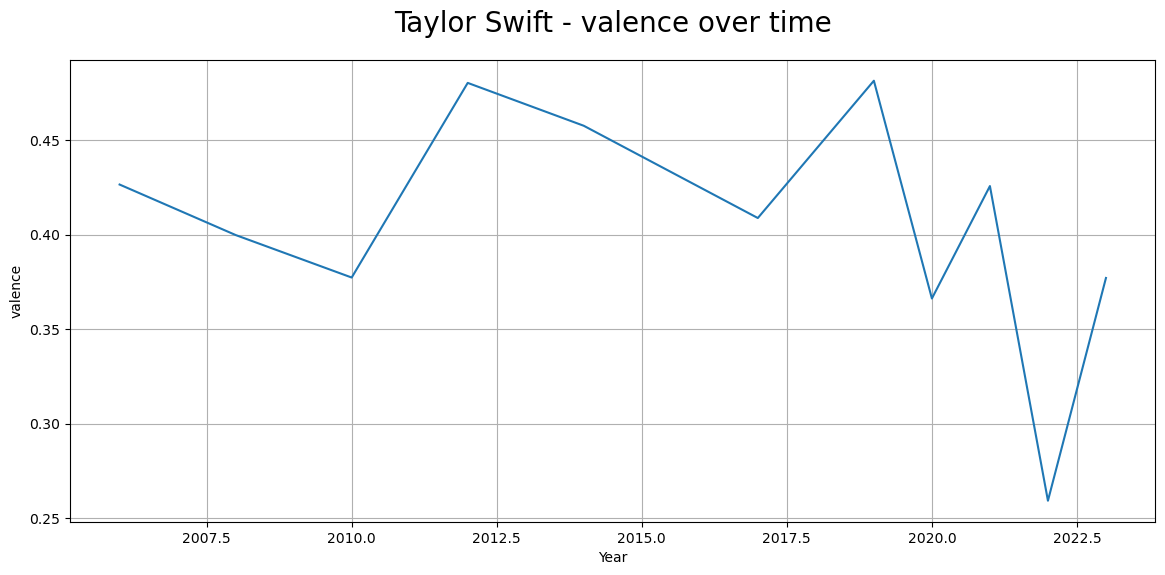

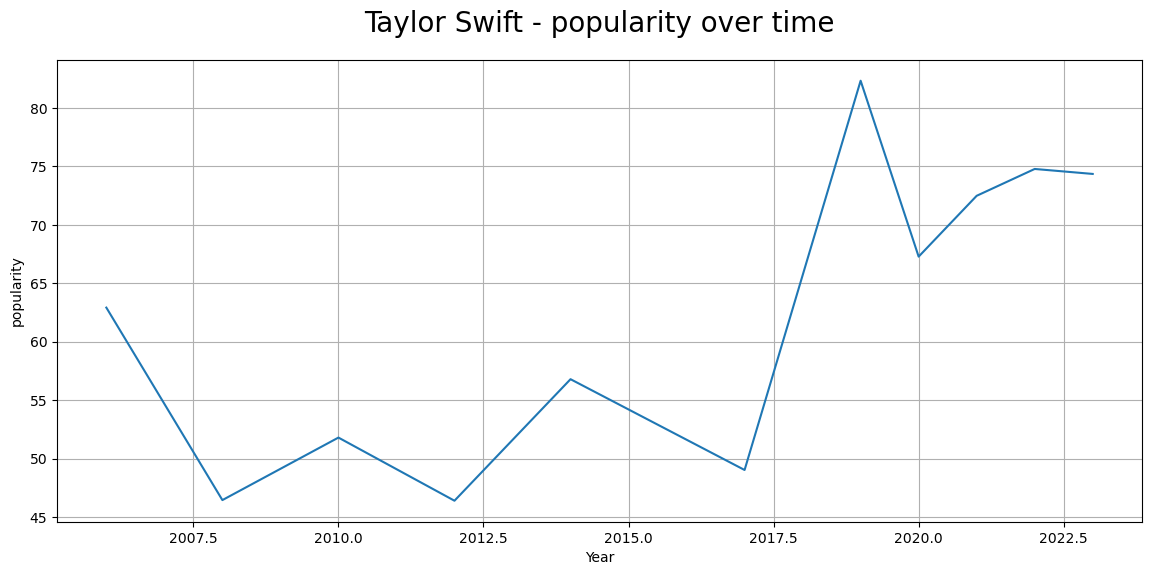

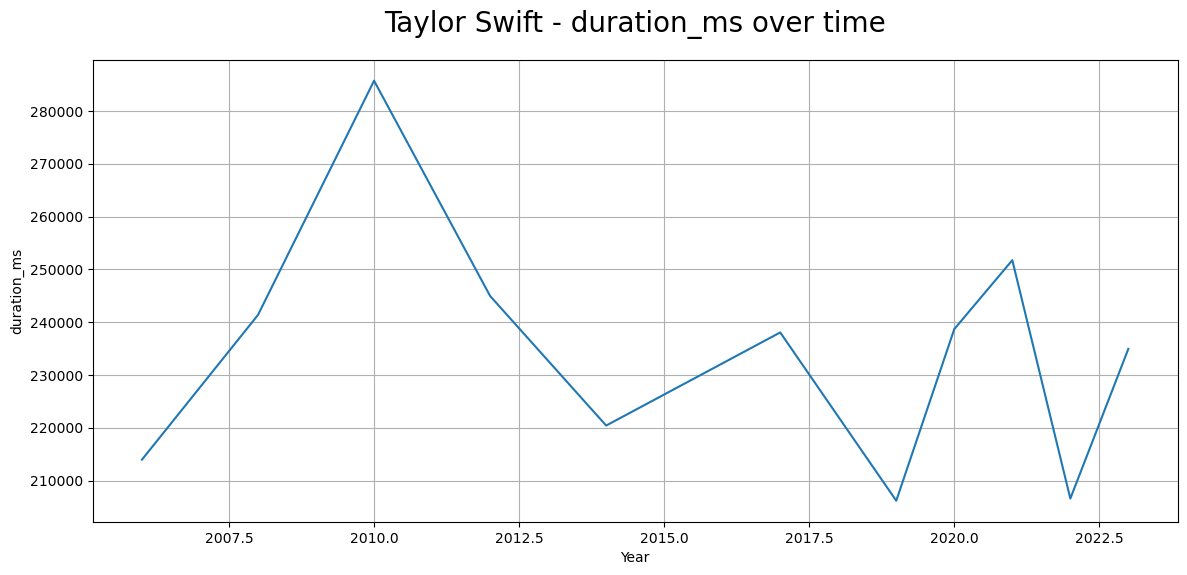

In [22]:
def plot_yearly_trends(df,artist_name):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns.remove('year')
    
    # Group by album_release_year and calculate mean of numeric columns
    yearly_data = df.groupby('year')[numeric_columns].mean()

    # Plot trends for each attribute
    for column in yearly_data.columns:
        plt.figure(figsize=(14, 6))
        plt.plot(yearly_data.index, yearly_data[column])
        plt.title(f'{artist_name} - {column} over time', pad=20, fontsize=20)
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

# Analyse trends for Taylor Swift
plot_yearly_trends(original_taylor_data, 'Taylor Swift')

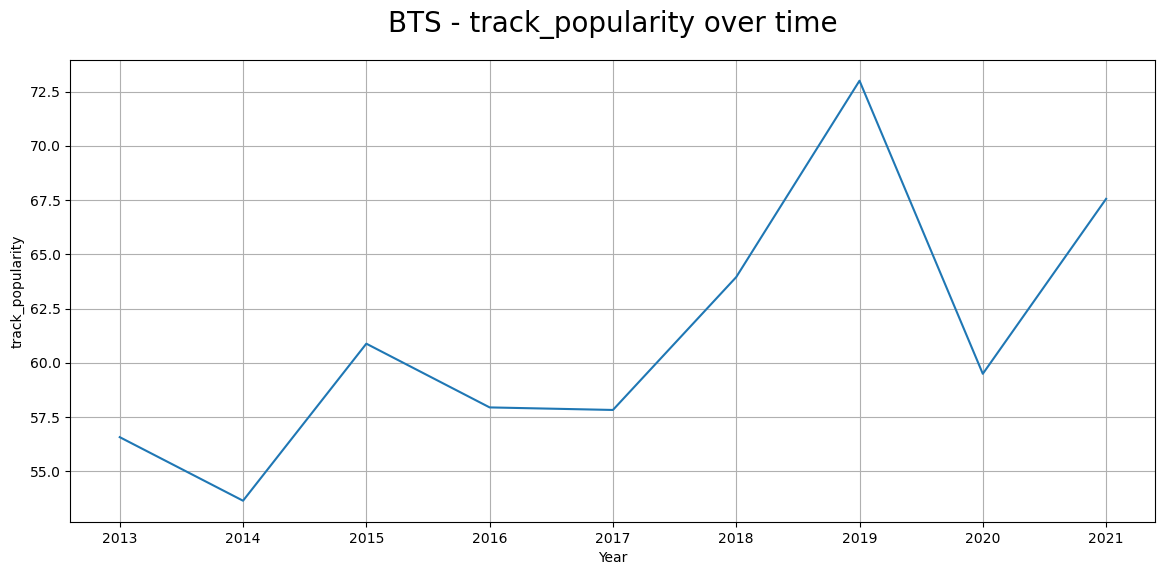

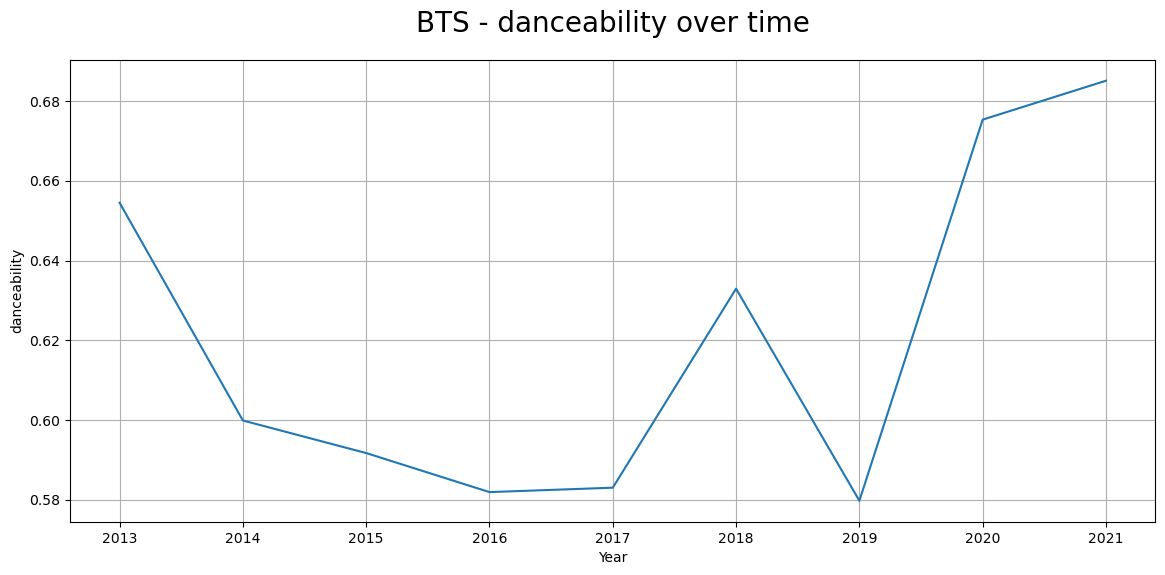

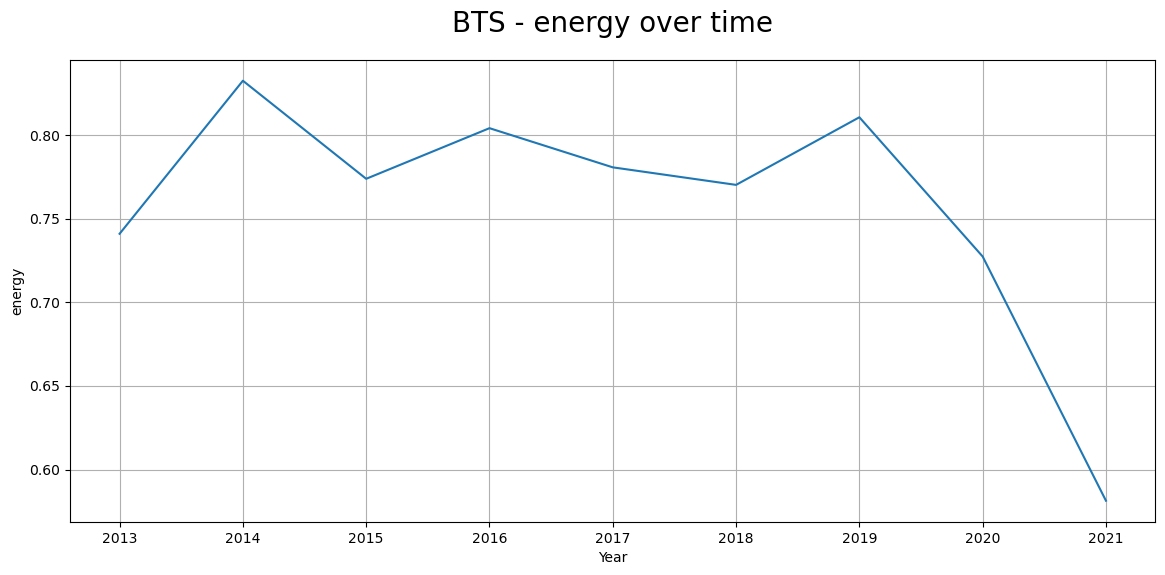

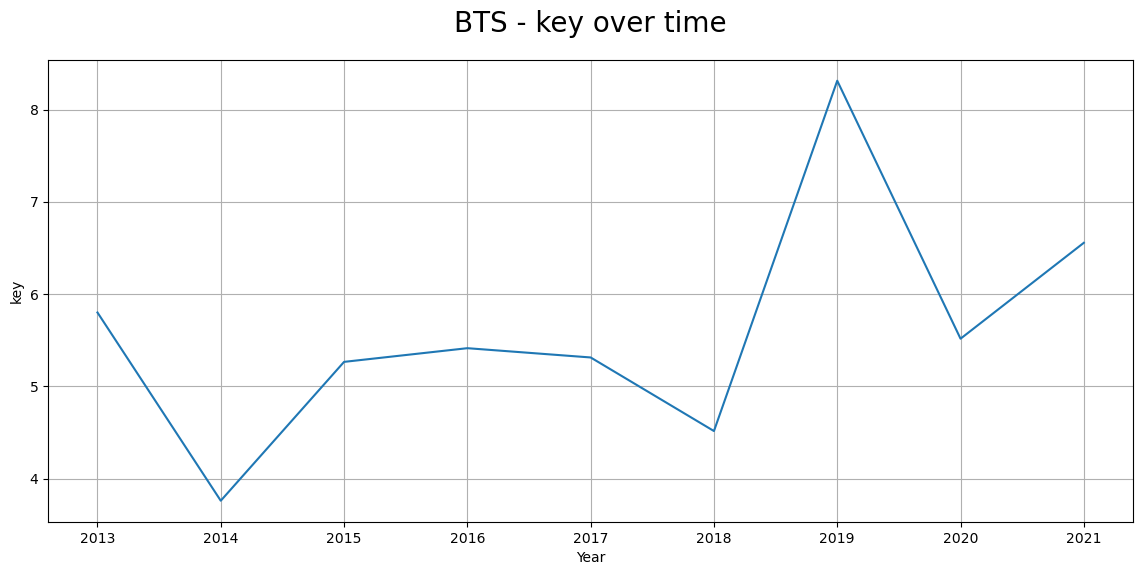

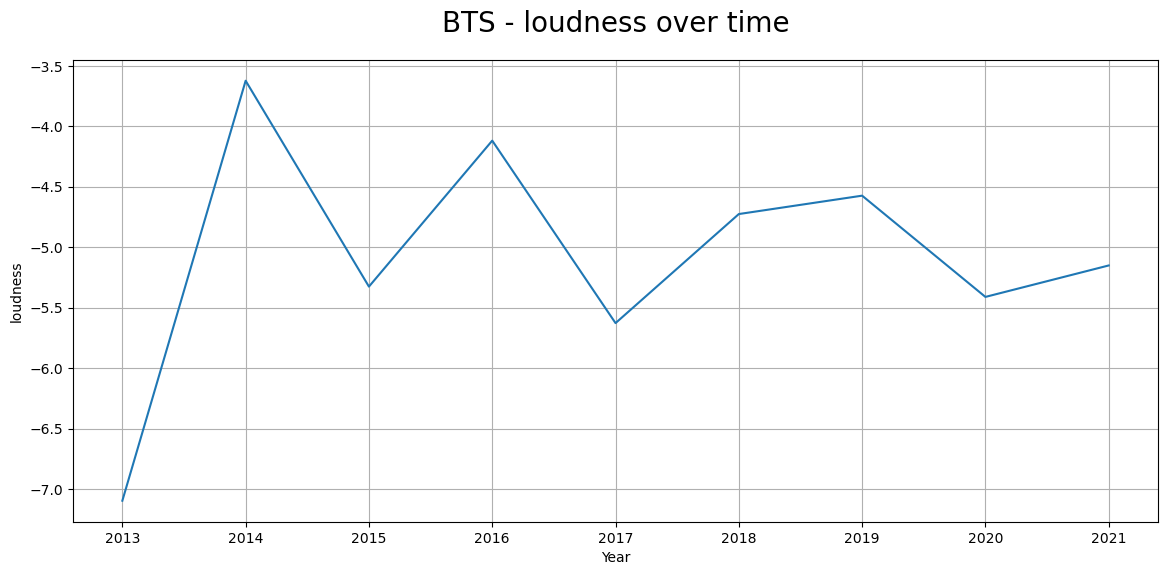

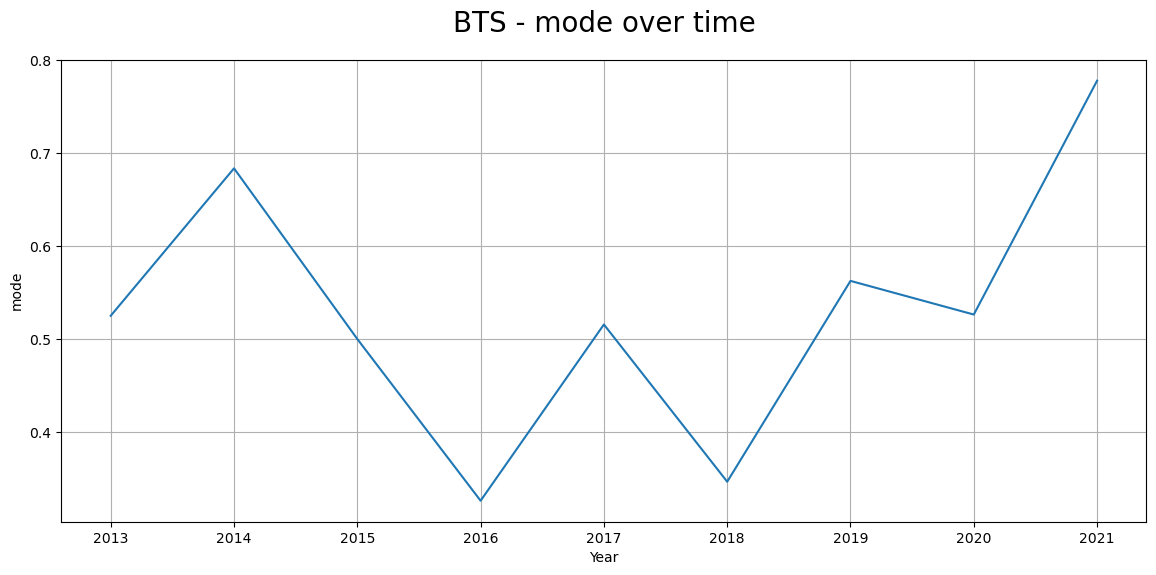

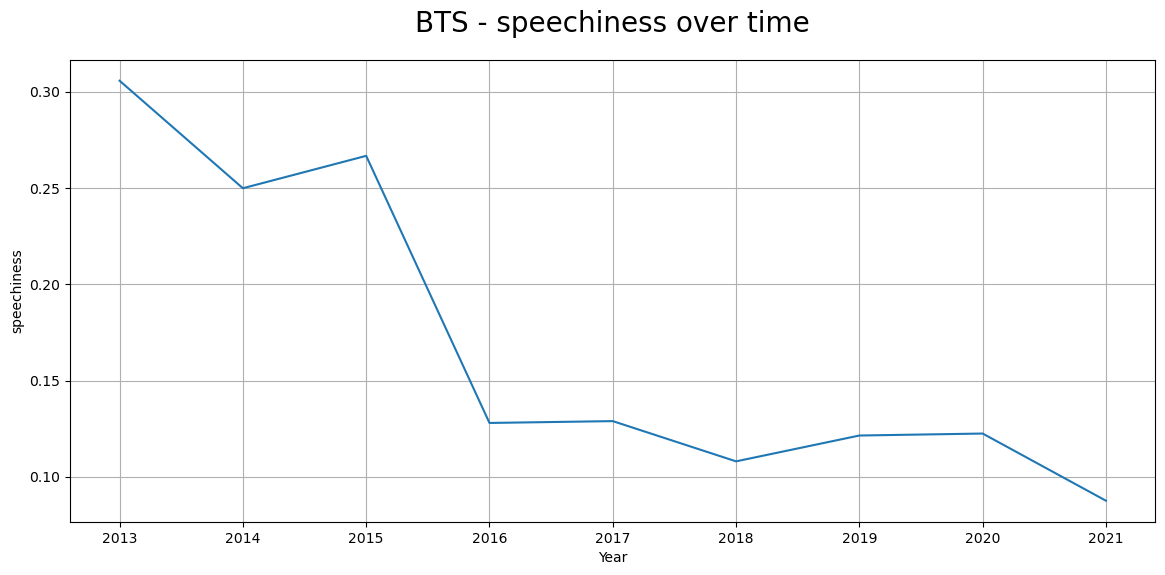

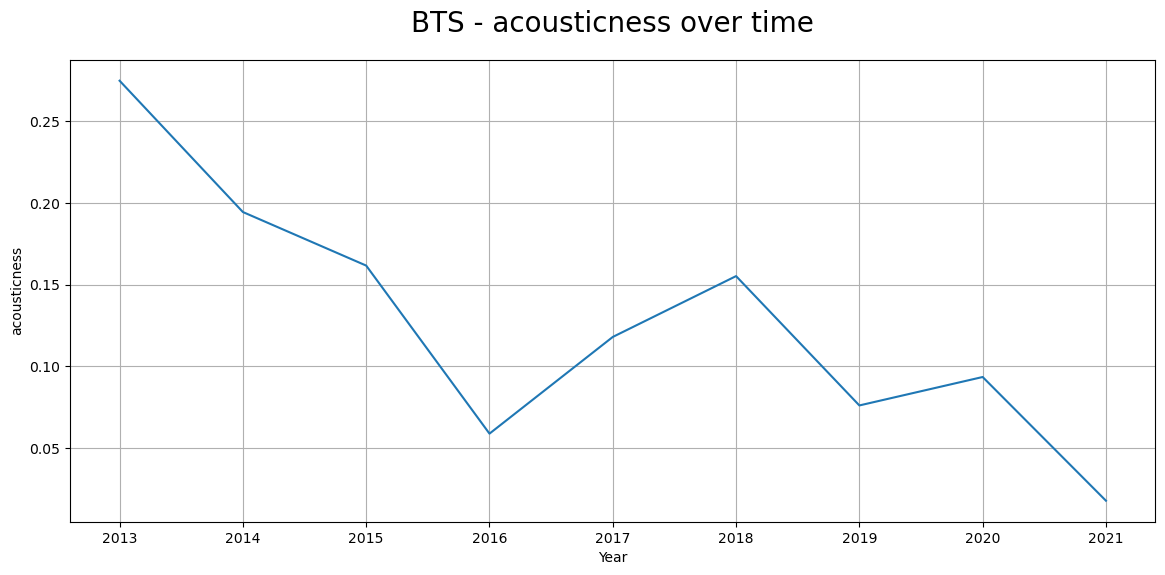

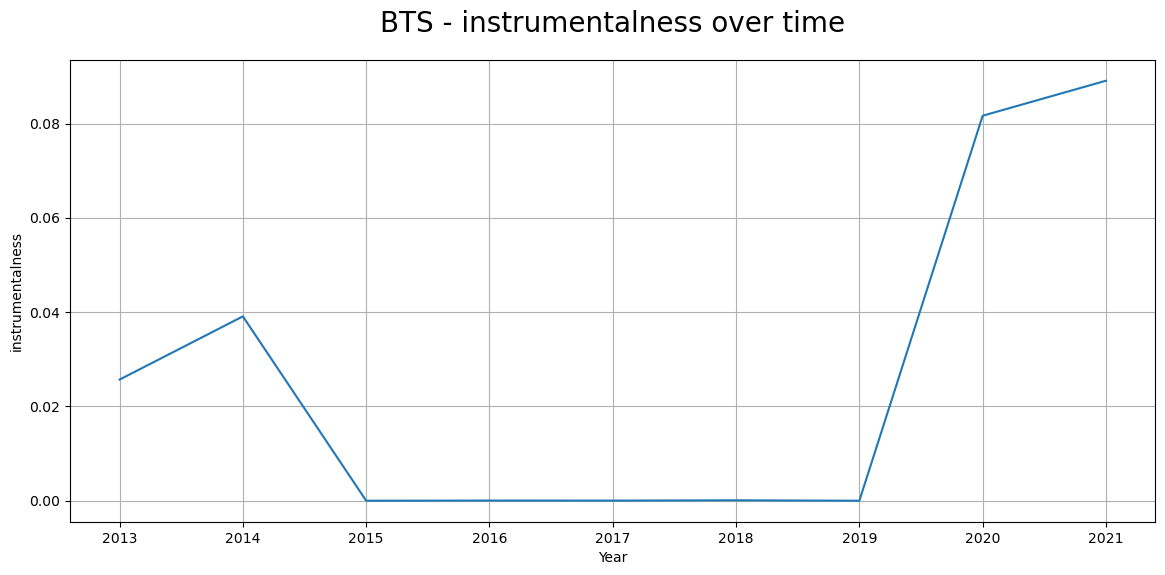

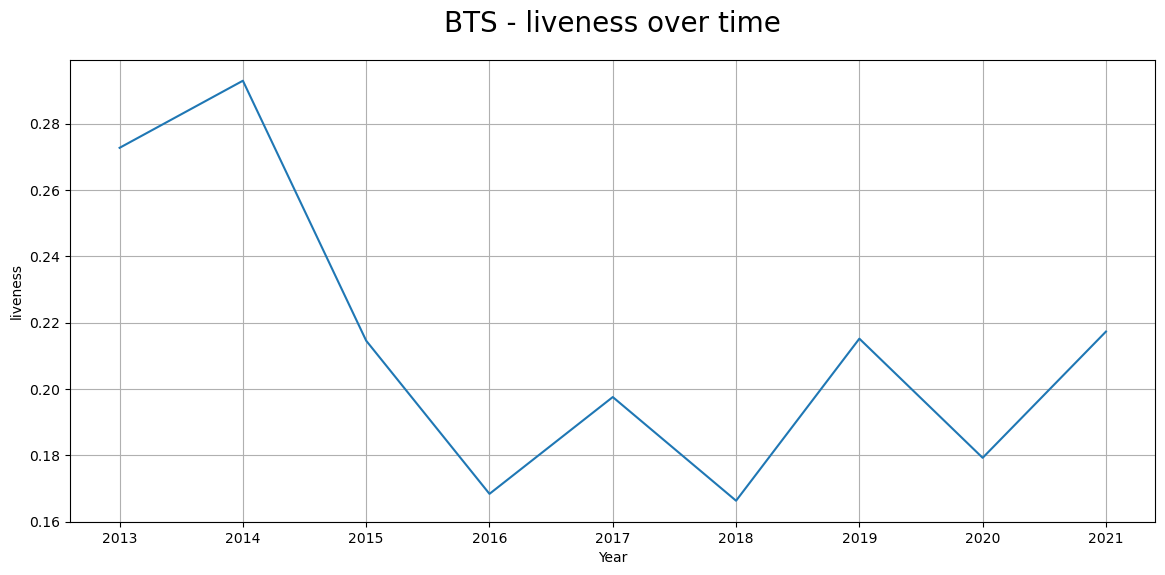

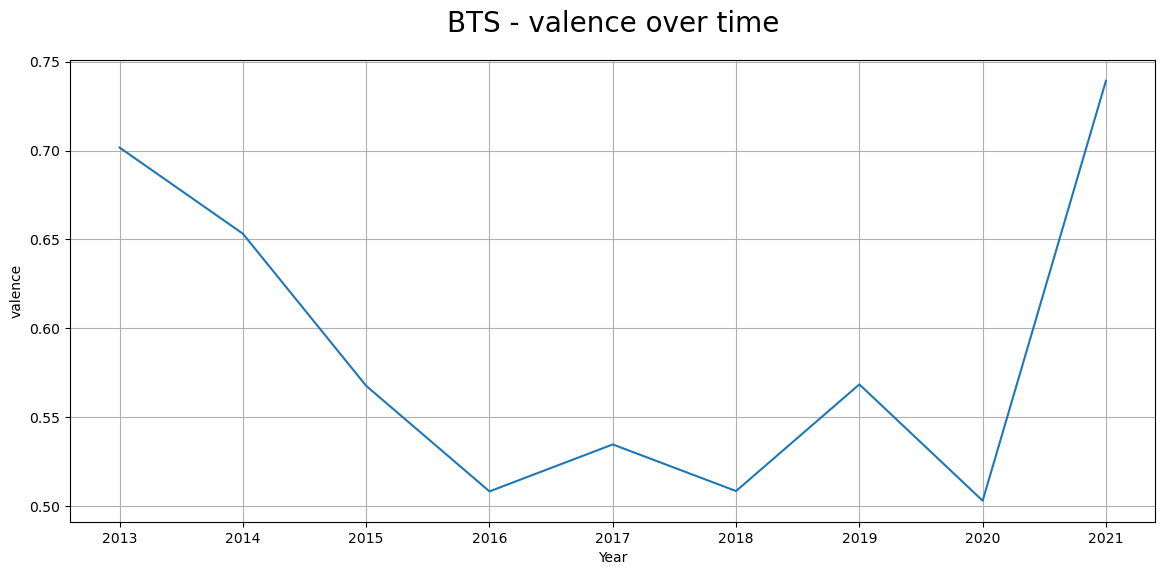

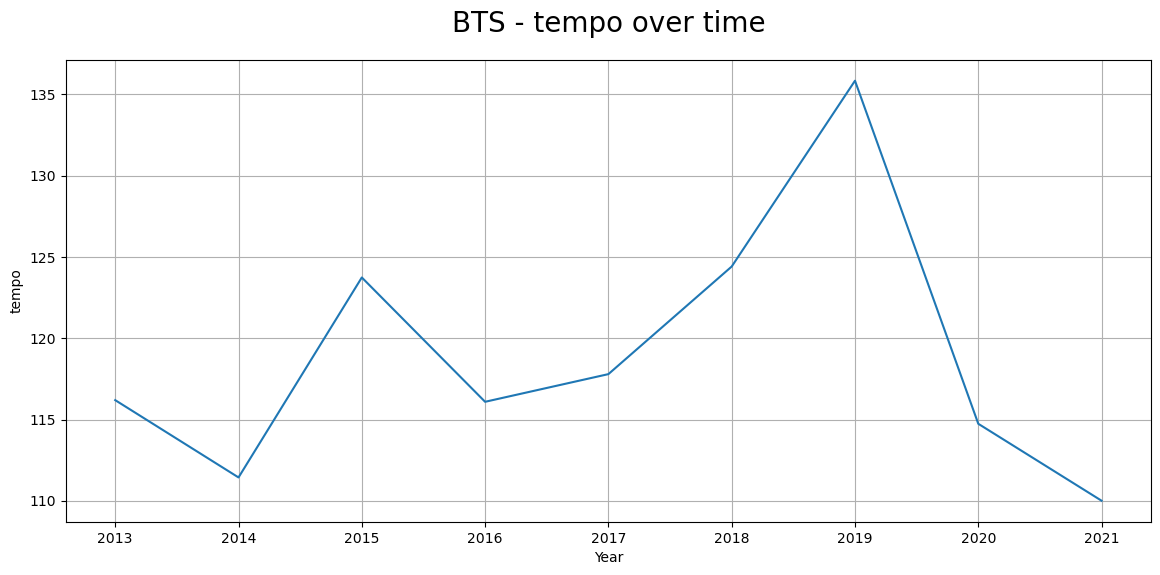

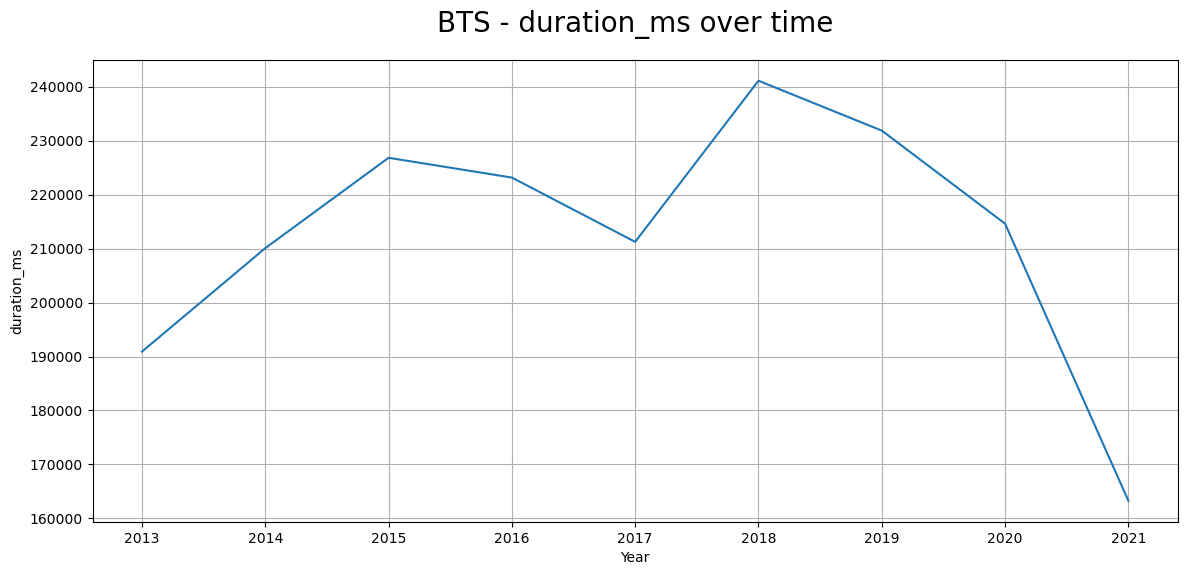

In [23]:
def plot_yearly_trends(df,artist_name):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns.remove('year')
    
    # Group by album_release_year and calculate mean of numeric columns
    yearly_data = df.groupby('year')[numeric_columns].mean()

    # Plot trends for each attribute
    for column in yearly_data.columns:
        plt.figure(figsize=(14, 6))
        plt.plot(yearly_data.index, yearly_data[column])
        plt.title(f'{artist_name} - {column} over time', pad=20, fontsize=20)
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()
plot_yearly_trends(bts_data, 'BTS')

## - Feature Selection 
Process where we automatically select those features in our data that contribute most to the prediction variable or output in which we are interested. This will give a score for each feature in our dataset, and we will then use these scores to select the most important features for data visualization, since otherwise there will be too much visual data. 

We have performed feature selection using the **ExtraTreesRegressor** from sklearn.ensemble. This classifier computes the feature importances which can be used to select the most important features.

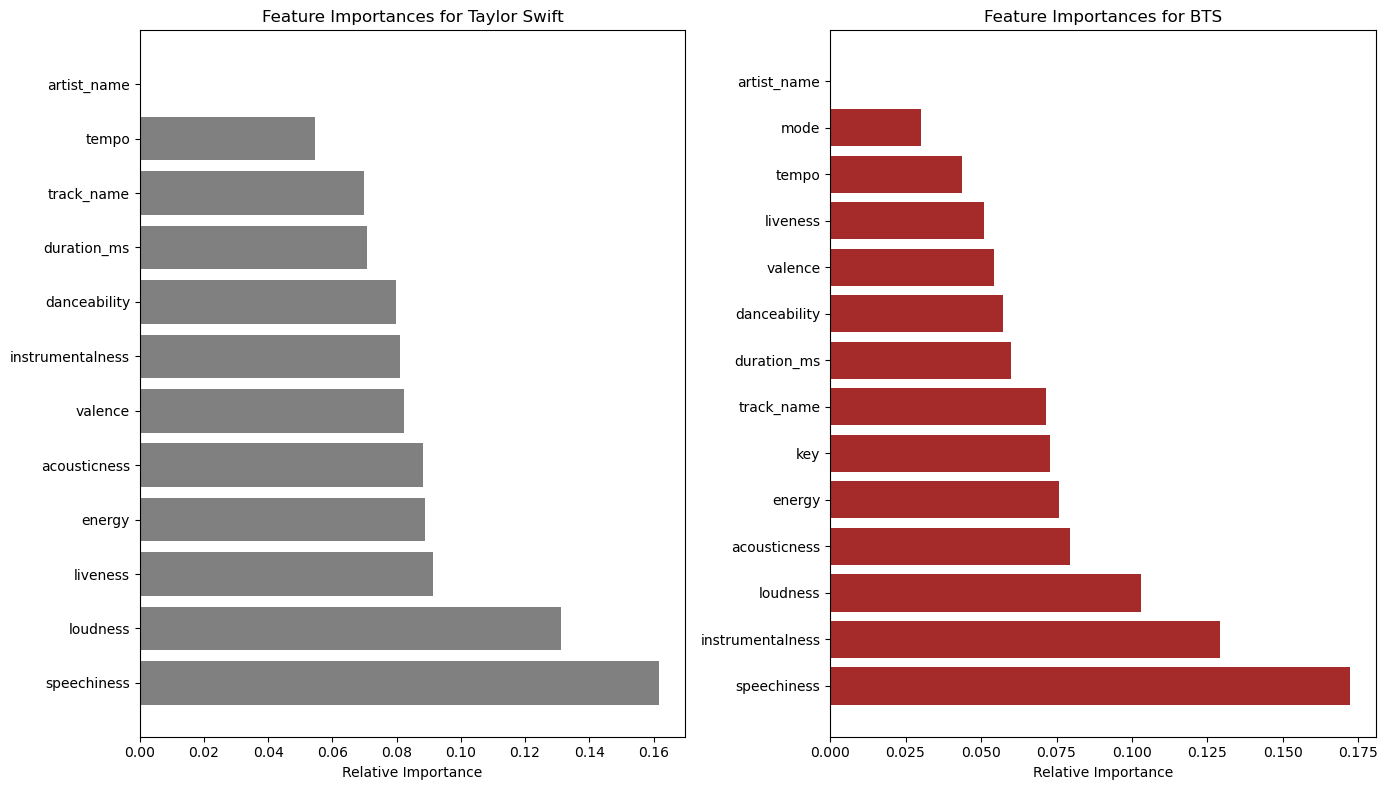

Top 3 features for Taylor Swift: 
speechiness: 0.16182380408603922
loudness: 0.13129644663930853
liveness: 0.09136001601232838

Top 3 features for BTS: 
speechiness: 0.1721295406953383
instrumentalness: 0.1293047848419882
loudness: 0.102941759753402


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Prepare data for Taylor Swift
X_taylor = original_taylor_data.drop(['popularity', 'album_name', 'year'], axis=1)
y_taylor = original_taylor_data['popularity']

# Encode categorical features
for col in X_taylor.columns:
    if X_taylor[col].dtype == 'object':
        X_taylor[col] = le.fit_transform(X_taylor[col])

# Fit model
model_taylor = ExtraTreesRegressor()
model_taylor.fit(X_taylor, y_taylor)

# Prepare data for BTS
X_bts = bts_data.drop(['track_popularity', 'album_title', 'year'], axis=1)
y_bts = bts_data['track_popularity']

# Encode categorical features
for col in X_bts.columns:
    if X_bts[col].dtype == 'object':
        X_bts[col] = le.fit_transform(X_bts[col])

# Fit model
model_bts = ExtraTreesRegressor()
model_bts.fit(X_bts, y_bts)

# Taylor Swift Feature Importances
taylor_feature_importances = model_taylor.feature_importances_
taylor_features = X_taylor.columns

# BTS Feature Importances
bts_feature_importances = model_bts.feature_importances_
bts_features = X_bts.columns

# Sorting features by importance
taylor_indices = np.argsort(taylor_feature_importances)[::-1]
bts_indices = np.argsort(bts_feature_importances)[::-1]

# Plotting Taylor Swift
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.title('Feature Importances for Taylor Swift')
plt.barh(range(len(taylor_indices)), taylor_feature_importances[taylor_indices], color='grey', align='center')
plt.yticks(range(len(taylor_indices)), [taylor_features[i] for i in taylor_indices])
plt.xlabel('Relative Importance')

# Plotting BTS
plt.subplot(122)
plt.title('Feature Importances for BTS')
plt.barh(range(len(bts_indices)), bts_feature_importances[bts_indices], color='brown', align='center')
plt.yticks(range(len(bts_indices)), [bts_features[i] for i in bts_indices])
plt.xlabel('Relative Importance')

plt.tight_layout()
plt.show()

# Get top 3 features for Taylor Swift
taylor_features = X_taylor.columns[model_taylor.feature_importances_.argsort()[::-1][:3]]
taylor_scores = model_taylor.feature_importances_[model_taylor.feature_importances_.argsort()[::-1][:3]]
print("Top 3 features for Taylor Swift: ")
for feature, score in zip(taylor_features, taylor_scores):
    print(f"{feature}: {score}")


# Get top 3 features for BTS
bts_features = X_bts.columns[model_bts.feature_importances_.argsort()[::-1][:3]]
bts_scores = model_bts.feature_importances_[model_bts.feature_importances_.argsort()[::-1][:3]]
print("\nTop 3 features for BTS: ")
for feature, score in zip(bts_features, bts_scores):
    print(f"{feature}: {score}")

From gini index, we found out that top 3 features for Taylor Swift are 'speechness', 'loudness','acousticness'. Top 3 features for BTS are 'speechiness', 'loudness', and 'instrumentalness'.
So, we further conduct data visualizations on these selected features.

Histograms:

In [26]:
import matplotlib.colors as mcolors
def analyse_dataframe(df, top_features):
    df = df[top_features]

    numeric_data_df = df.select_dtypes(include=['number'])
    numeric_data_df = numeric_data_df.apply(pd.to_numeric, errors='coerce')
    numeric_data_df = numeric_data_df.dropna()

    # Histogram
    colors = list(mcolors.CSS4_COLORS.keys())[10:10+len(top_features)]  
    for i, var in enumerate(top_features):
        if var in numeric_data_df.columns:
            f = plt.figure(figsize=(4, 4))
            sb.histplot(x=var, data=df, kde=True, color=colors[i])
            plt.title(f'Histogram of {var}')
            plt.show()

    # Box plots
    df.boxplot(figsize=(12, 8))
    plt.title('Boxplots of Columns')
    plt.xticks(rotation=45)
    plt.show()

    # Scatter plots
    sb.pairplot(df, diag_kind='kde')
    plt.suptitle('Scatter Plots of Columns', fontsize=16)
    plt.show()


    # Heatmap
    plt.figure(figsize=(6, 4))
    sb.heatmap(numeric_data_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

top_taylor_features = ['speechiness', 'loudness', 'acousticness']
top_bts_features = ['speechiness', 'instrumentalness', 'loudness']

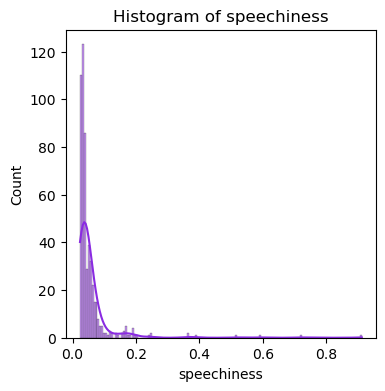

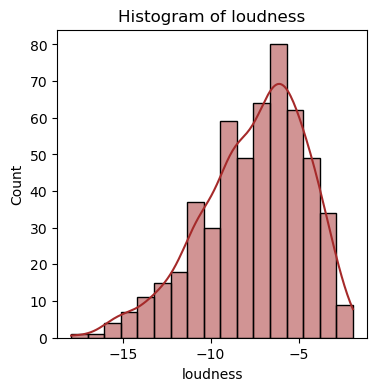

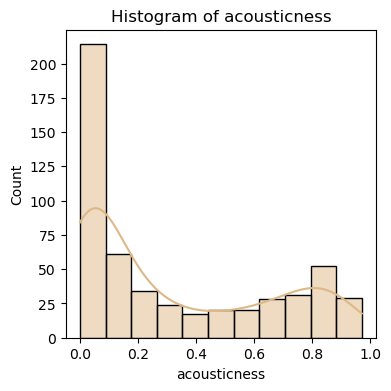

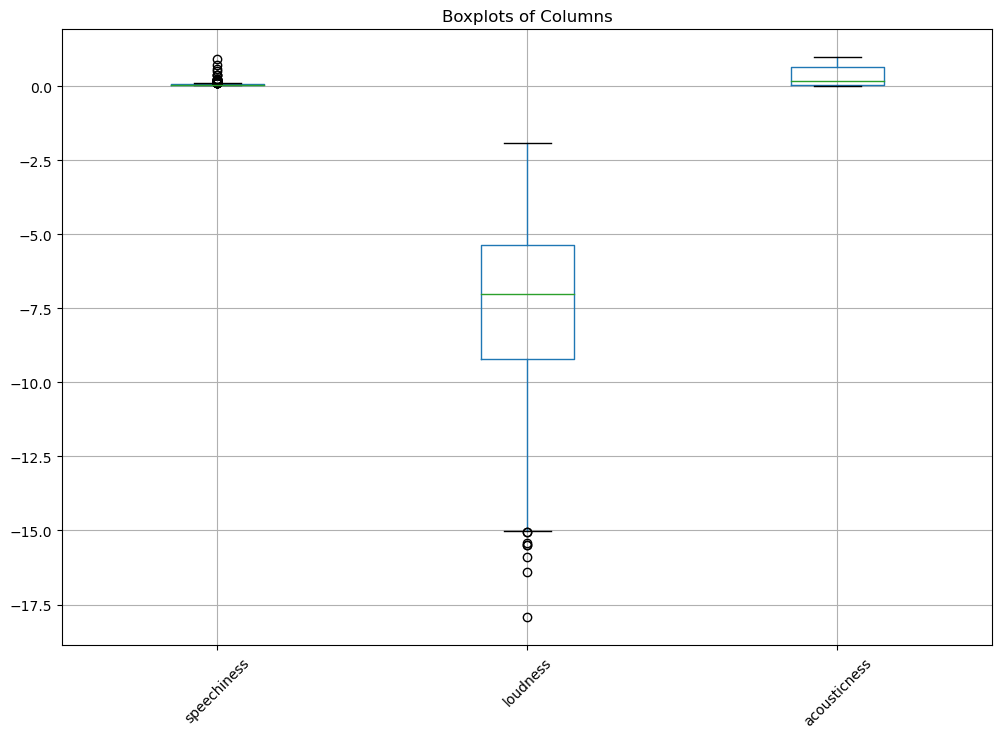

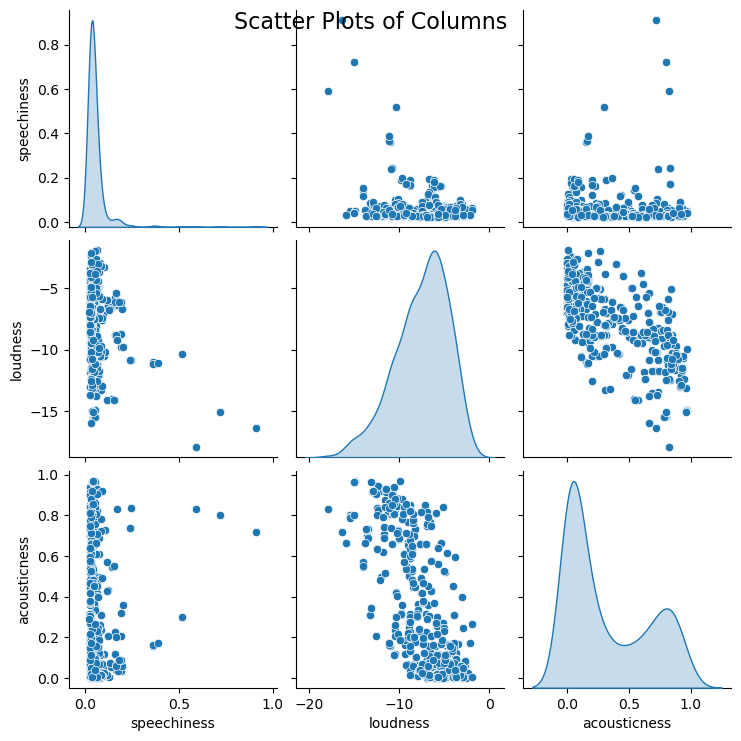

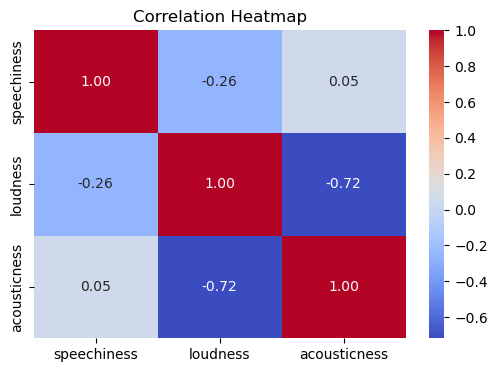

In [27]:
analyse_dataframe(original_taylor_data, top_taylor_features)

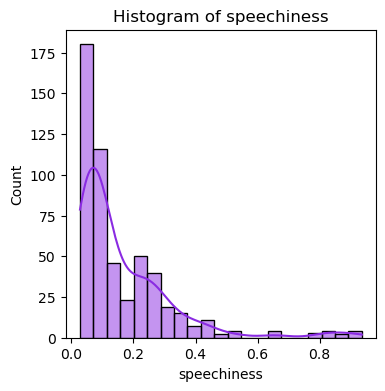

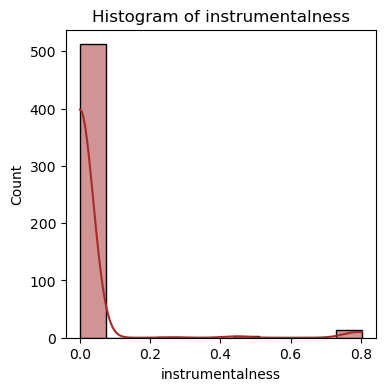

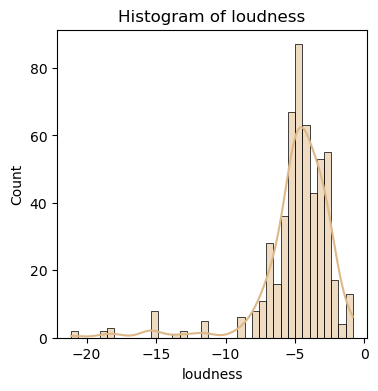

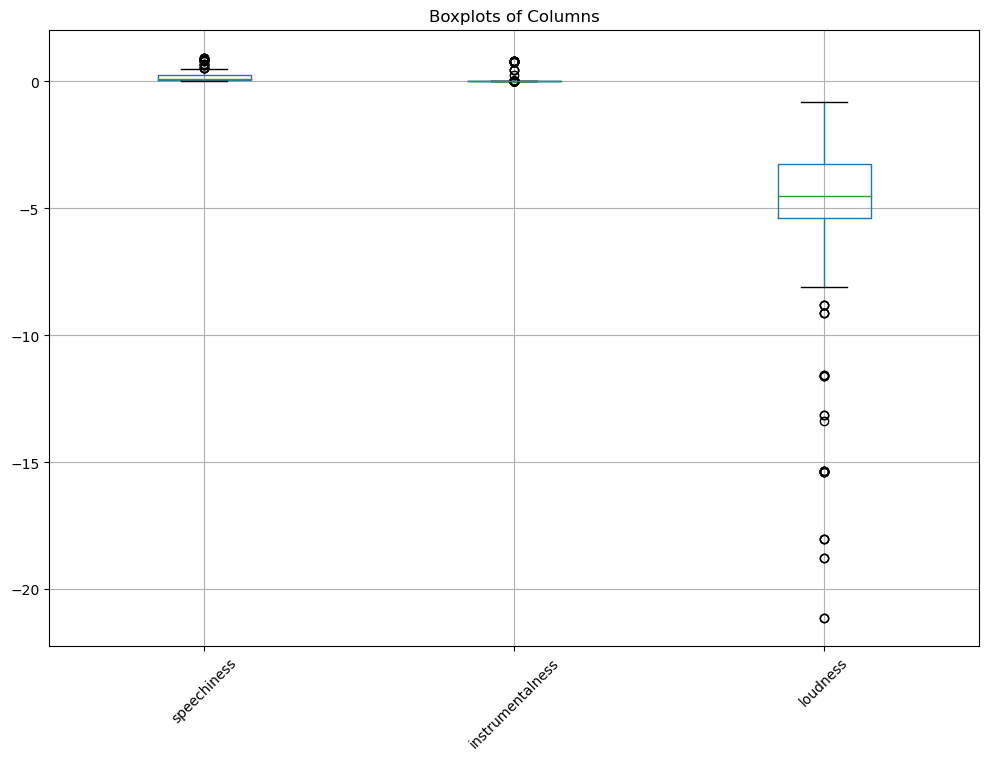

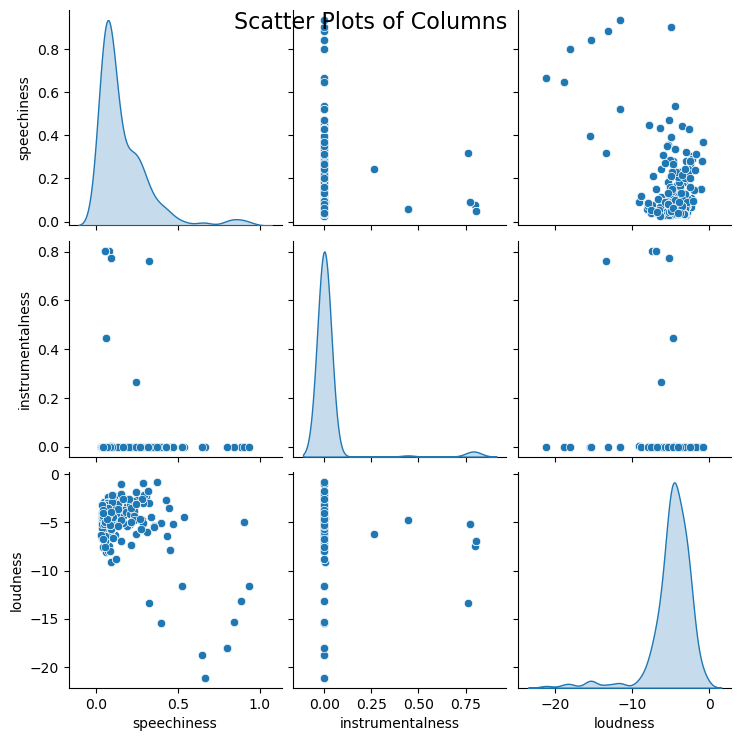

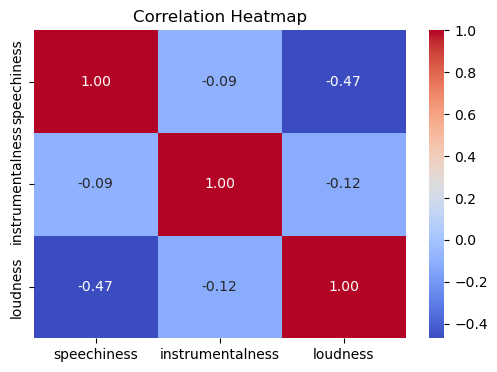

In [28]:
analyse_dataframe(bts_data, top_bts_features)

In [29]:
def analyse_dataframe(df, top_features, target='popularity'):
    df = df[top_features + [target]] if target not in top_features else df[top_features]
    colors = list(mcolors.CSS4_COLORS.keys())[10:10+len(top_features)]  
    numeric_data_df = df.select_dtypes(include=['number'])
    numeric_data_df = numeric_data_df.apply(pd.to_numeric, errors='coerce')
    numeric_data_df = numeric_data_df.dropna()

    # Scatter plots and regression lines for each feature vs. popularity
    for var in top_features:
        plt.figure(figsize=(6, 4))
        sb.regplot(x=var, y=target, data=df, color=colors[top_features.index(var) % len(colors)], line_kws={"color": "red"})
        plt.title(f'Relationship between {var} and {target}')
        plt.show()

    # Heatmap showing correlations between numeric features and popularity
    plt.figure(figsize=(6, 4))
    correlation_matrix = numeric_data_df.corr()
    sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


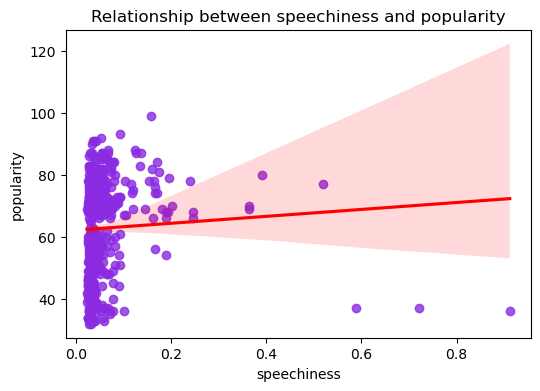

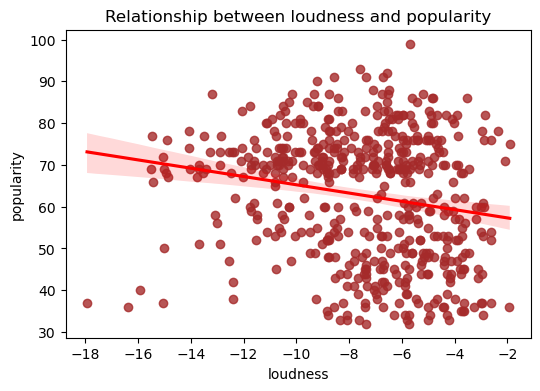

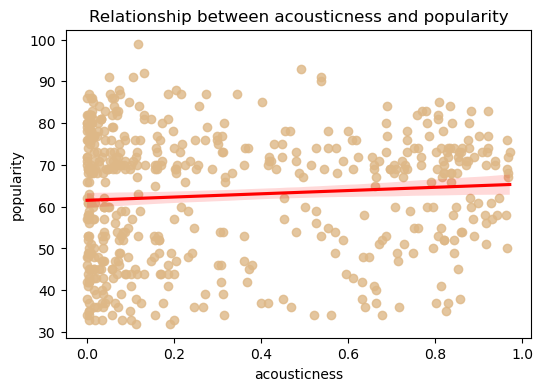

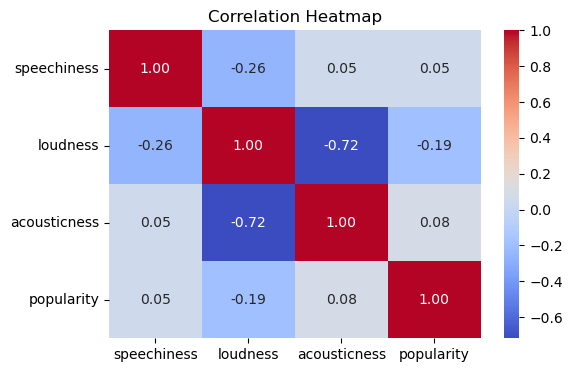

In [30]:
analyse_dataframe(original_taylor_data, top_taylor_features)

In [31]:
def analyse_dataframe(df, top_features, target='track_popularity'):
    df = df[top_features + [target]] if target not in top_features else df[top_features]
    colors = list(mcolors.CSS4_COLORS.keys())[10:10+len(top_features)]  
    numeric_data_df = df.select_dtypes(include=['number'])
    numeric_data_df = numeric_data_df.apply(pd.to_numeric, errors='coerce')
    numeric_data_df = numeric_data_df.dropna()

    # Scatter plots and regression lines for each feature vs. popularity
    for var in top_features:
        plt.figure(figsize=(6, 4))
        sb.regplot(x=var, y=target, data=df, color=colors[top_features.index(var) % len(colors)], line_kws={"color": "red"})
        plt.title(f'Relationship between {var} and {target}')
        plt.show()

    # Heatmap showing correlations between numeric features and popularity
    plt.figure(figsize=(6, 4))
    correlation_matrix = numeric_data_df.corr()
    sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


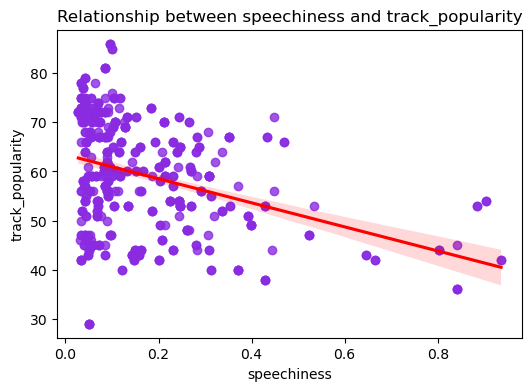

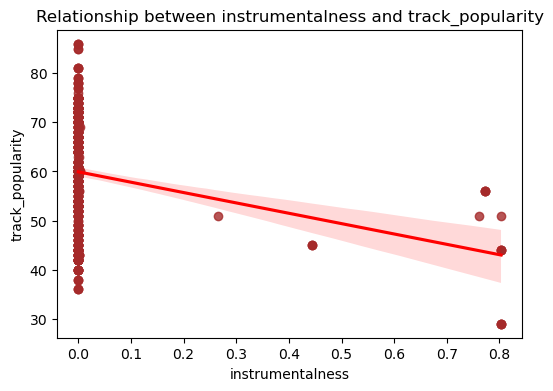

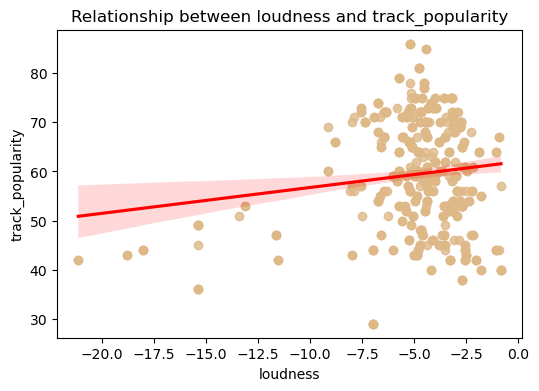

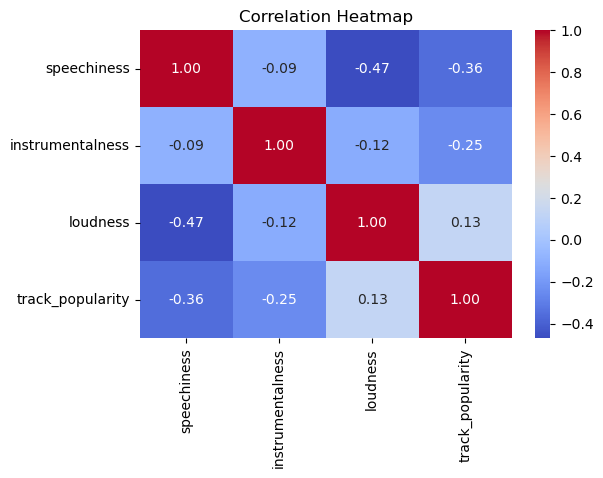

In [32]:
analyse_dataframe(bts_data, top_bts_features)

## Machine Learning Modelling:

This code performs two main tasks on a combined dataset of songs from 'Taylor Swift' and 'BTS' :-

First, it uses a Random Forest Classifier to predict the artist of a song based on various features. It trains the model on a training set, makes predictions on a test set, and then calculates and prints the accuracy, precision, and recall of these predictions. It also uses SHAP (SHapley Additive exPlanations) to analyse and plot the importance of each feature in the Random Forest model.

Second, the code uses Ridge Regression to predict the 'energy' of a song, again based on various features. It trains this model on a separate training set, makes predictions on a separate test set, and then calculates and prints the explained variance of these predictions.

The code will output the following:

1) Predicted artists: An array of predicted artists for the test set, based on the Random Forest classifier model.
2) Predicted energy levels: An array of predicted energy levels for the songs in the test set, based on the Ridge Regression model.
3) Classification Metrics: The accuracy, precision, and recall of the Random Forest classifier model. These are numerical values between 0 and 1, with 1 indicating perfect performance.
4) SHAP Summary Plot: A bar chart showing the importance of each feature in the Random Forest model. The features are ranked by importance, with the most important feature at the top.
5) Explained Variance: A numerical value between 0 and 1 indicating the proportion of total variance in 'energy' that is captured by the Ridge Regression model.

Points to note:

1) We have used Adjusted R-squared as it adjusts the statistic based on the number of features in the model. R-squared always increases as you add more features to the model, even if those features are not related to the target variable.
2) We have take Taylor Swift to be the positive class, meaning, we predict whether a song is by Taylor Swift or not. "True positive" is a song that our model correctly identified as a Taylor Swift song. A "false positive" is a song that our model incorrectly identified as a Taylor Swift song. Similarly, a "True negative" is a song that our model correctly identified as not being a Taylor Swift song, and a "False negative" is a song that our model incorrectly identified as not being a Taylor Swift song.
Precision is the proportion of true positives out of all predicted positives (i.e., it measures how many of the songs that we predicted as Taylor Swift songs are actually Taylor Swift songs), while recall is the proportion of true positives out of all actual positives (i.e., it measures how many of the actual Taylor Swift songs we were able to correctly identify).

Predicted artists: ['BTS' 'Taylor Swift' 'Taylor Swift' 'BTS' 'BTS' 'BTS' 'Taylor Swift'
 'BTS' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'BTS' 'Taylor Swift' 'Taylor Swift' 'BTS' 'BTS'
 'Taylor Swift' 'BTS' 'Taylor Swift' 'BTS' 'Taylor Swift' 'BTS' 'BTS'
 'Taylor Swift' 'Taylor Swift' 'BTS' 'Taylor Swift' 'BTS' 'BTS' 'BTS'
 'BTS' 'Taylor Swift' 'BTS' 'BTS' 'BTS' 'Taylor Swift' 'Taylor Swift'
 'BTS' 'Taylor Swift' 'BTS' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'BTS' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'BTS' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'BTS'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'BTS' 'BTS' 'Taylor Swift' 'BTS' 'Taylor Swift' 'BTS'
 'BTS' 'BTS' 'BTS' 'BTS' 'Taylor Swift' 'BTS' 'BTS' 'Taylor Swift' 'BTS'
 'Taylor Swift' 'Taylor Swift' 'BTS' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'BTS' 'Taylor Swift' 'BTS' 'Taylor Swift' 'Taylor Swift'
 'BTS' 'BTS' 

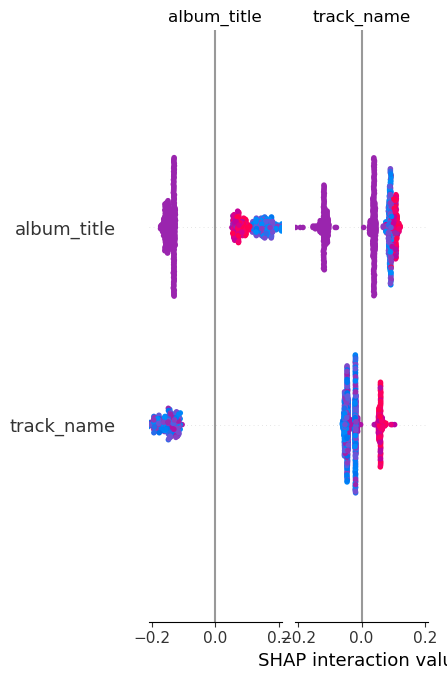

Predicted energy levels: [0.75872541 0.78052361 0.33687271 0.80264735 0.89574595 0.7873992
 0.23658819 0.75710216 0.63673605 0.61043607 0.81077342 0.76961193
 0.54051489 0.7650002  0.54526299 0.56990218 0.84291033 0.86038066
 0.32758909 0.76607387 0.48937775 0.75900278 0.69957538 0.84972623
 0.81953223 0.34884197 0.71358186 0.75288034 0.3505717  0.84190179
 0.7739989  0.8520841  1.01894982 0.39350765 0.79385074 0.91533052
 0.38293499 0.69832642 0.63241453 0.73089904 0.80315948 0.76403202
 0.13335236 0.54460329 0.74875521 0.62063732 0.73393226 0.81703224
 0.35885295 0.62117848 0.4263779  0.69503782 0.73765798 0.43761686
 0.3560827  0.89294275 0.53524928 0.81845289 0.63172276 0.74968567
 0.49286776 0.84408148 0.21759567 0.50145022 0.81527461 0.42366127
 0.89294275 0.81518317 0.51199954 0.60273103 0.76866793 0.51970443
 0.59587068 0.84023554 0.78797195 0.80022815 0.55377643 0.75336738
 0.7497807  0.35211465 0.78622179 0.88590873 1.03610995 0.38763053
 0.6391529  0.24141341 0.49344703 0.68

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
import shap
import pandas as pd
import numpy as np


# Assuming 'artist_name' is the column indicating the artist and all other columns are features
features = bts_data.columns.drop('artist_name')
target = 'artist_name'

# Combine the data
combined_data = pd.concat([original_taylor_data, bts_data])

# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in features:
    if combined_data[col].dtype == 'object':
        combined_data[col] = le.fit_transform(combined_data[col])

# Fill missing values with the mean of the numeric columns
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns
combined_data[numeric_columns] = combined_data[numeric_columns].fillna(combined_data[numeric_columns].mean())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_data[features], combined_data[target], test_size=0.2, random_state=42)

# Classification: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Print the predicted artists
print('Predicted artists:', rf_predictions)

# Classification Metrics
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, pos_label='Taylor Swift')  # assuming 'Taylor Swift' is the positive class
recall = recall_score(y_test, rf_predictions, pos_label='Taylor Swift')

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

# Feature Importance Analysis with SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Regression: Predict 'energy' using Ridge Regression
features = combined_data.columns.drop(['artist_name', 'energy'])
target = 'energy'

# Convert categorical features to numerical using Label Encoding
for col in features:
    if combined_data[col].dtype == 'object':
        combined_data[col] = le.fit_transform(combined_data[col])

X_train, X_test, y_train, y_test = train_test_split(combined_data[features], combined_data[target], test_size=0.2, random_state=42)

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

# Print the predicted energy levels
print('Predicted energy levels:', ridge_predictions)

# Goodness of Fit: Explained Variance
r_squared = ridge.score(X_test, y_test)

# Number of observations
n = X_test.shape[0]

# Number of predictors
p = X_test.shape[1]

# Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f'R-squared: {r_squared}, Adjusted R-squared: {adjusted_r_squared}')

Random Forest Regressor model to predict Track popularity based on features revealed as important by Feature Selection for each Artist. Lower the MAE, more accurate our model and feature importance. 

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Preprocess categorical features
for feature in ['album_name', 'track_name', 'album_title']:
    if feature in original_taylor_data.columns:
        le = LabelEncoder()
        original_taylor_data[feature] = le.fit_transform(original_taylor_data[feature])
    if feature in bts_data.columns:
        le = LabelEncoder()
        bts_data[feature] = le.fit_transform(bts_data[feature])

# Define the features and target for Taylor Swift
X_taylor = original_taylor_data[['album_name', 'loudness', 'acousticness', 'liveness']]
y_taylor = original_taylor_data['popularity']

# Define the features and target for BTS
X_bts = bts_data[['album_title', 'speechiness', 'valence', 'duration_ms']]
y_bts = bts_data['track_popularity']

# Split the data into training and testing sets for both artists
X_train_taylor, X_test_taylor, y_train_taylor, y_test_taylor = train_test_split(X_taylor, y_taylor, test_size=0.2, random_state=42)
X_train_bts, X_test_bts, y_train_bts, y_test_bts = train_test_split(X_bts, y_bts, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor models
model_taylor = RandomForestRegressor(n_estimators=100, random_state=42)
model_bts = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
model_taylor.fit(X_train_taylor, y_train_taylor)
model_bts.fit(X_train_bts, y_train_bts)

# Make predictions
predictions_taylor = model_taylor.predict(X_test_taylor)
predictions_bts = model_bts.predict(X_test_bts)

# Evaluate the models
mae_taylor = mean_absolute_error(y_test_taylor, predictions_taylor)
mae_bts = mean_absolute_error(y_test_bts, predictions_bts)

print(f"MAE for Taylor Swift: {mae_taylor}")
print(f"MAE for BTS: {mae_bts}")

# Convert predictions and actual values to dataframes for easier visualization
df_taylor_predictions = pd.DataFrame({'Actual': y_test_taylor, 'Predicted': predictions_taylor})
df_bts_predictions = pd.DataFrame({'Actual': y_test_bts, 'Predicted': predictions_bts})

# Display the actual and predicted popularity for the test set of Taylor Swift
print("\nPredictions for Taylor Swift:")
print(df_taylor_predictions)

# Display the actual and predicted popularity for the test set of BTS
print("\nPredictions for BTS:")
print(df_bts_predictions)

MAE for Taylor Swift: 5.432075471698114
MAE for BTS: 2.869433962264152

Predictions for Taylor Swift:
     Actual  Predicted
140      67      70.71
398      42      57.36
6        69      74.21
334      36      37.28
322      36      40.88
..      ...        ...
341      37      42.68
431      49      48.68
131      71      70.44
338      34      35.61
514      34      46.98

[106 rows x 2 columns]

Predictions for BTS:
     Actual  Predicted
140      67      65.57
398      58      57.49
6        47      50.82
334      66      65.86
322      53      57.31
..      ...        ...
341      42      43.99
431      52      53.79
131      75      75.00
338      42      42.22
514      60      55.52

[106 rows x 2 columns]


Given that the popularity range is from 0 to 100, the Mean Absolute Errors (MAEs) of 5.43 for Taylor Swift and 3.08 for BTS can be considered relatively low, indicating that the models are performing reasonably well.

In the context of this range, an MAE of 5.43 for Taylor Swift means that on average, the model's predictions are off by about 5.43 popularity points out of 100. Similarly, an MAE of 3.08 for BTS means that on average, the model's predictions are off by about 3.08 popularity points out of 100.

## Predicting popularity

Now, we combine these two datasets and predict song popularity. We try using different models to see which one performs the best.

1. Linear Regression Model

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Check for NaNs and fill or drop them as necessary
features = combined_df.drop(['popularity', 'artist_name', 'album_name'], axis=1)
features = features.apply(lambda x: x.fillna(x.mean()), axis=0)
target = combined_df['popularity'].fillna(combined_df['popularity'].mean())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)  # Train the model

# Predict on the test set
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print performance metrics
print("Linear Regression performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression performance:
RMSE: 8.29
R²: 0.25


2. Decision Tree

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for Decision Tree)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = dt_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor performance:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Decision Tree Regressor performance:
MSE: 74.1874
R²: 0.4814


3. Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest performance:
RMSE: 7.72
R²: 0.58


According to RMSE and R², we see that random forest has the lowest RMSE and highest R², so it performs the best for predicting popularity.

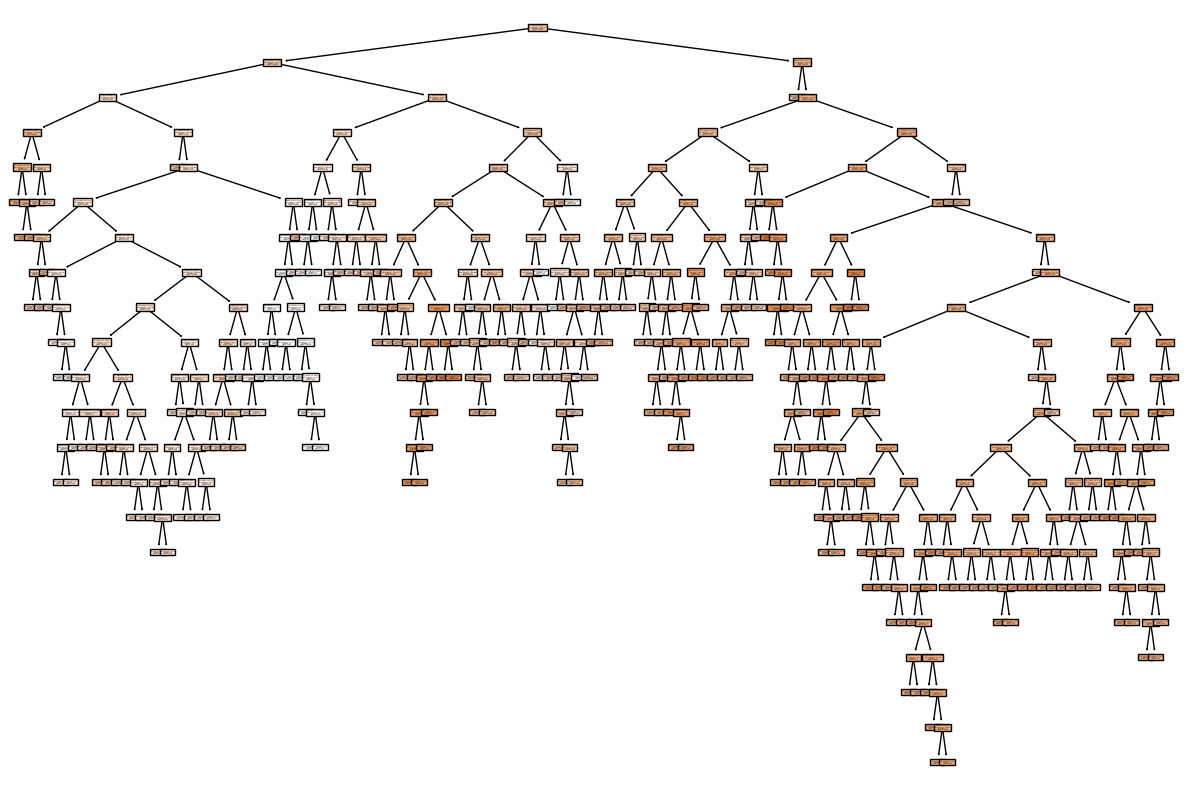

Average Depth of Trees: 19.1
Number of Estimators (Trees): 100


In [49]:
from sklearn.tree import plot_tree

feature_names_list = X_train.columns.tolist()

plt.figure(figsize=(15, 10))
plot_tree(rf_regressor.estimators_[0], feature_names=feature_names_list, filled=True)
plt.show()

# Calculate the depth of the trees in the Random Forest
max_depth = np.mean([estimator.tree_.max_depth for estimator in rf_regressor.estimators_])

# Get the number of estimators (trees) in the Random Forest
n_estimators = len(rf_regressor.estimators_)

print(f"Average Depth of Trees: {max_depth}")
print(f"Number of Estimators (Trees): {n_estimators}")


It has average depth = 19.2 and number of estimators = 100.

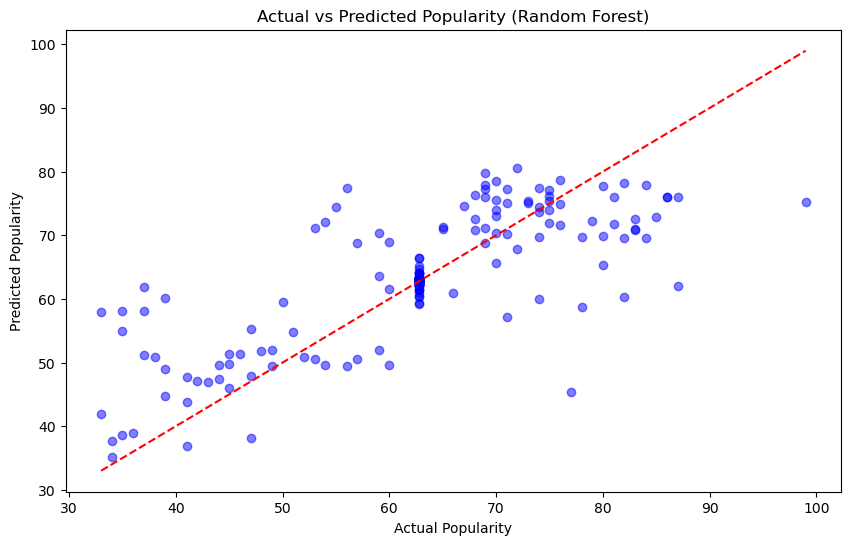

In [94]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Random Forest)')
plt.show()

This scatter plot compares the actual popularity values (on the x-axis) with the predicted popularity values by the Random Forest model (on the y-axis). 

In [97]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature importance scores
print("Feature importance scores:")
for i, feature_index in enumerate(indices):
    print(f"{i + 1}. {feature_names_list[feature_index]}: {feature_importances[feature_index]}")


Feature importance scores:
1. year: 0.42690620605580853
2. speechiness: 0.14422322921955552
3. track_name: 0.06005932896238487
4. album_title: 0.05090572466996004
5. loudness: 0.038751568187440535
6. tempo: 0.03691085757798695
7. energy: 0.0354282580003565
8. liveness: 0.03078794208266896
9. acousticness: 0.03008617686233001
10. valence: 0.02831188359935732
11. danceability: 0.027538164131790232
12. instrumentalness: 0.02691872380658222
13. duration_ms: 0.022564599568822095
14. track_popularity: 0.014606403461015261
15. mode: 0.0142047912848837
16. key: 0.011796142529057302


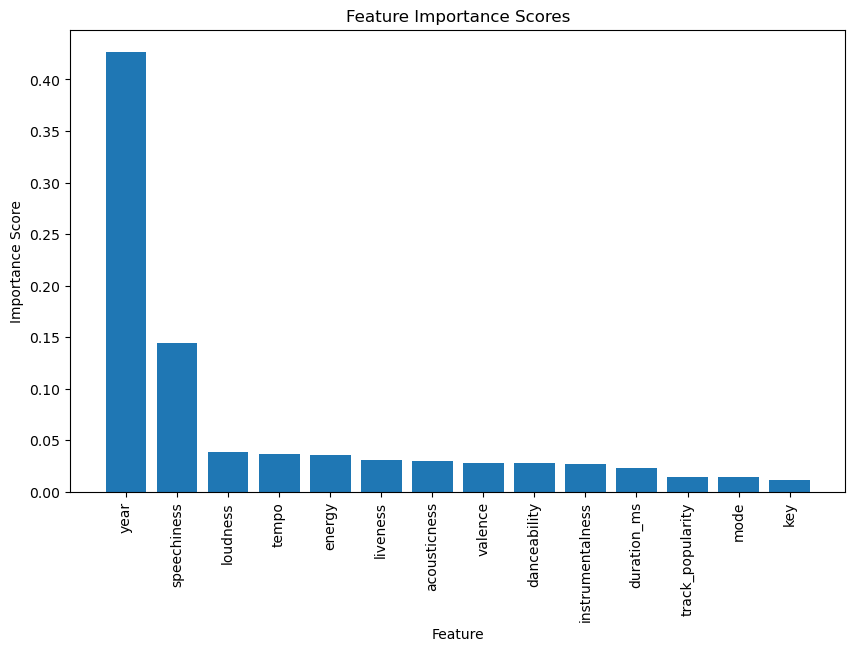

In [99]:
import matplotlib.pyplot as plt

# Sort filtered feature importances and feature names using the same indices
sorted_filtered_feature_names = [filtered_feature_names[i] for i in indices]
sorted_filtered_importances = [filtered_importances[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_filtered_importances)), sorted_filtered_importances, align='center')
plt.xticks(range(len(sorted_filtered_importances)), sorted_filtered_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

According to the model, we identify the features that are significant in predicting popularity.

In order to better predict whether a song will be popular or not, we classify popularity into 3 levels: "low", "medium" and "high".

In [140]:
quartiles = pd.qcut(combined_data['popularity'], q=4, labels=["low", "medium","high"], duplicates='drop')

combined_data['popularity_category'] = quartiles

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

# One-hot encoding categorical variables
X = pd.get_dummies(combined_data.drop(['popularity', 'popularity_category'], axis=1), drop_first=True)
y = combined_data['popularity_category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate precision
precision = precision_score(y_test, y_pred, average=None, labels=["low", "medium", "high"])
precision_dict = dict(zip(["low","medium","high"], precision))
print("Precision by class:", precision_dict)


Precision by class: {'low': 0.9801324503311258, 'medium': 0.5, 'high': 0.8983050847457628}


We can see that the model does well in predicting low and high popularity songs but not as good as in moderate-popularity songs.

In [154]:
import pandas as pd

grouped_data = combined_data.groupby('popularity_category')

# Generate descriptive statistics for each group
descriptive_stats = grouped_data.describe()

mean_stats = descriptive_stats.xs('mean', level=1, axis=1)
mean_stats_dropped = mean_stats.drop(['track_name', 'album_name','popularity','track_popularity'], axis=1)
mean_stats_dropped

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,year,album_title,key,mode
popularity_category,,,,,,,,,,,,,,
low,0.180744,0.605694,0.720241,0.016729,0.201339,-5.475544,0.127470,119.230368,0.511852,227486.401042,2015.630208,9.943396,5.128302,0.483019
medium,0.410901,0.570056,0.528306,0.009852,0.157528,-8.817278,0.072419,131.010222,0.376806,232745.166667,2020.111111,9.943396,5.128302,0.483019
high,0.337366,0.595977,0.559188,0.006306,0.136939,-8.029961,0.060408,121.328434,0.385828,234420.375000,2020.683594,9.943396,5.128302,0.483019


According to the above table, we can see that: 
1) Songs released before 2015 has lower popularities, and after 2020 they have much higher popularities.
2) Songs that have more speechness seem to receive lower popularity.
3) Lower loudness decreases popularity.

Highly popular songs tend to be generally high level of acousticness, a mix of instruments and vocal, and moderate energy level.

## Conclusion

Based on the theoretical context and model results, we can see that release date is an essential feature. Music producers and artists may consider 
1) recycling old songs by taking into account some audio feature composition that makes music highly popular, e.g. danceable, positive, and loud; 
2) focus on creating digital music that combines music and vocal elements on the audio; 
3) avoid full instrumental music 
4) keep the song dur- ation on average about three to a maximum of four minutes; 